### Name: Ahmed Mohiuddin Shah
### CMS ID: 415216
### Section: BSCS-12-A
### Lab: 10

# PreLab

## Installing New Libraries

In [283]:
# %pip install hdbscan 

## Learning Intuition 

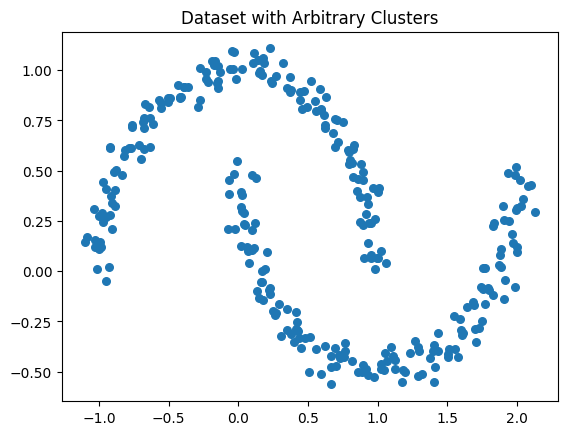

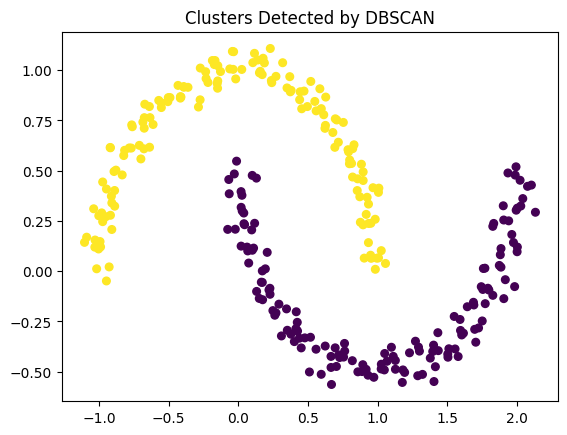

In [284]:
# Consider the following dataset: 
from sklearn.datasets import make_moons 
import matplotlib.pyplot as plt 
X, _ = make_moons(n_samples=300, noise=0.05, random_state=42) 
plt.scatter(X[:, 0], X[:, 1], s=30) 
plt.title("Dataset with Arbitrary Clusters") 
plt.show() 
# Apply DBSCAN to it. 
from sklearn.cluster import DBSCAN 
dbscan = DBSCAN(eps=0.2, min_samples=5) 
y_pred = dbscan.fit_predict(X) 
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', s=30) 
plt.title("Clusters Detected by DBSCAN") 
plt.show() 

## Best Practices for Parameter Selection 

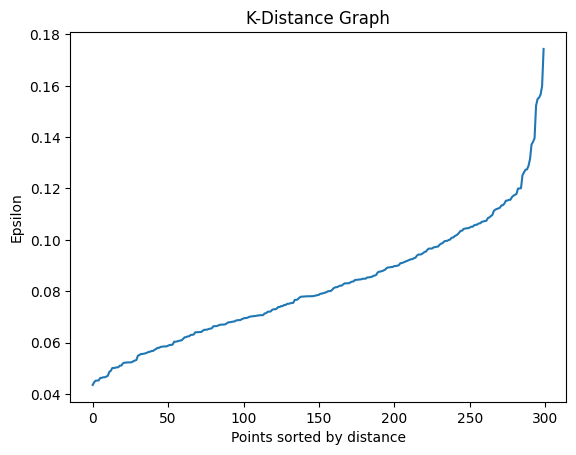

In [285]:
# Finding Optimal eps through a k-distance graph. 
from sklearn.neighbors import NearestNeighbors 
import numpy as np 
neighbors = NearestNeighbors(n_neighbors=5) 
neighbors_fit = neighbors.fit(X) 
distances, indices = neighbors_fit.kneighbors(X) 
distances = np.sort(distances[:, -1]) 
plt.plot(distances) 
plt.title("K-Distance Graph") 
plt.xlabel("Points sorted by distance") 
plt.ylabel("Epsilon") 
plt.show() 

- Look for the "elbow point" in the graph to determine a suitable eps.
- For tuning min_samples, a good heuristic is `min_samples = dimensionality of data + 1`

## Implementaion of DBSCAN

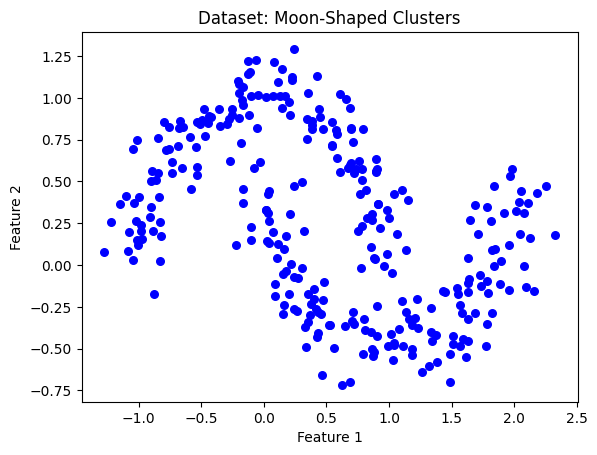

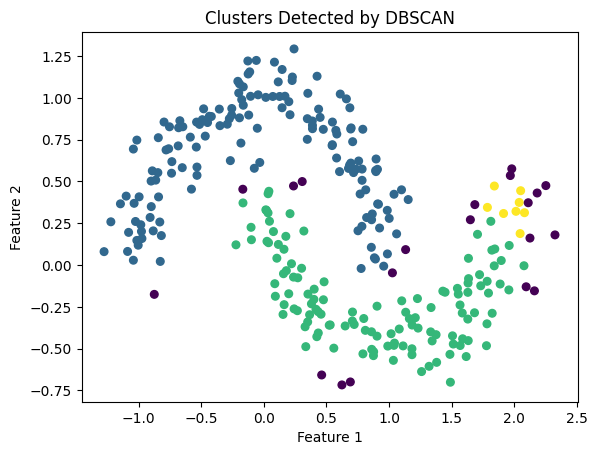

In [286]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

# Generate moon-shaped data
X, y = make_moons(n_samples=300, noise=0.12, random_state=42)
# Visualize the dataset
plt.scatter(X[:, 0], X[:, 1], s=30, color="b")
plt.title("Dataset: Moon-Shaped Clusters")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=10)
# Fit the model and predict clusters
y_pred = dbscan.fit_predict(X)
# Visualize the clusters
plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap="viridis", s=30)
plt.title("Clusters Detected by DBSCAN")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

## Understanding the Output:

In [287]:
# Display unique cluster labels
unique_labels = set(y_pred)
print(f"Unique cluster labels: {unique_labels}")

Unique cluster labels: {np.int64(0), np.int64(1), np.int64(2), np.int64(-1)}


## Visualizing Noise and Clusters Seperately

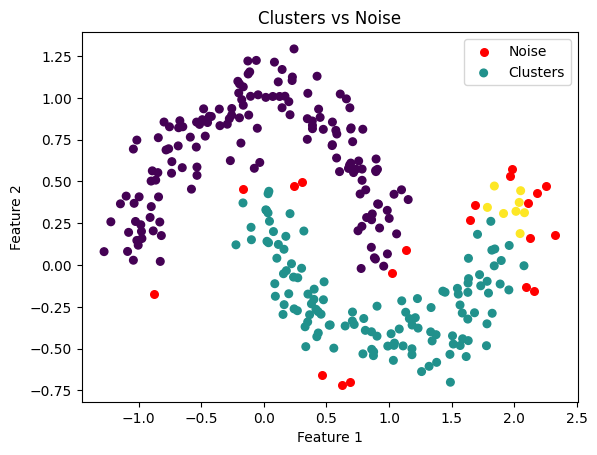

In [288]:
# Separate noise and clusters
noise_points = X[y_pred == -1] 
clusters = X[y_pred != -1] 
plt.scatter(noise_points[:, 0], noise_points[:, 1], c="red", s=30, label="Noise")
plt.scatter(
    clusters[:, 0],
    clusters[:, 1],
    c=y_pred[y_pred != -1],
    cmap="viridis",
    s=30,
    label="Clusters",
)
plt.title("Clusters vs Noise")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

## Practical Example on Real Data

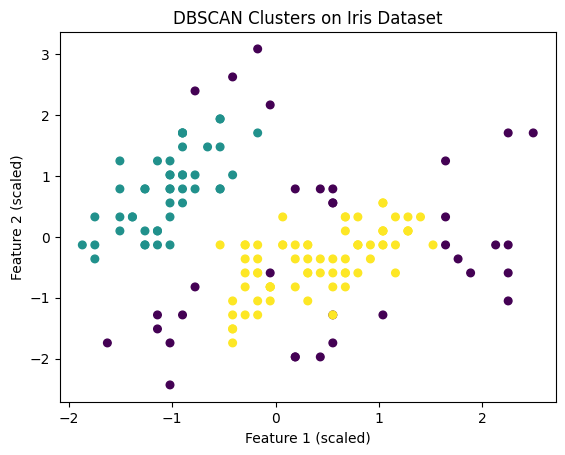

In [289]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

# Load Iris dataset
iris = load_iris()
X = iris.data
# Scale data to normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Apply DBSCAN
dbscan_iris = DBSCAN(eps=0.5, min_samples=5)
y_iris_pred = dbscan_iris.fit_predict(X_scaled)
# Visualize results (only first 2 features)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_iris_pred, cmap="viridis", s=30)
plt.title("DBSCAN Clusters on Iris Dataset")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.show()

## Fine-Tuning DBSCAN Parameters

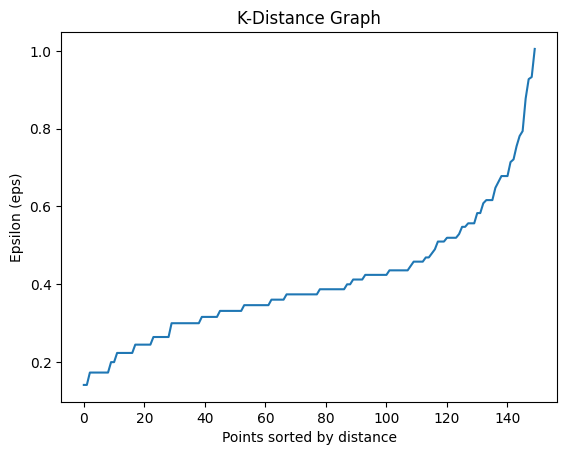

In [290]:
from sklearn.neighbors import NearestNeighbors
# Compute the k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X)
distances, _ = neighbors_fit.kneighbors(X)
# Sort distances and plot
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon (eps)")
plt.show()

## Handling Large Datasets (HDBSCAN)

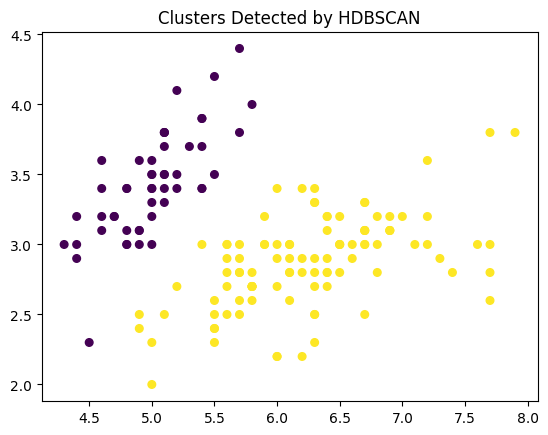

In [291]:
import hdbscan 
# Apply HDBSCAN 
hdb = hdbscan.HDBSCAN(min_cluster_size=5) 
y_hdb = hdb.fit_predict(X) 
# Visualize clusters 
plt.scatter(X[:, 0], X[:, 1], c=y_hdb, cmap='viridis', s=30) 
plt.title("Clusters Detected by HDBSCAN") 
plt.show() 

## K-Means Visualization

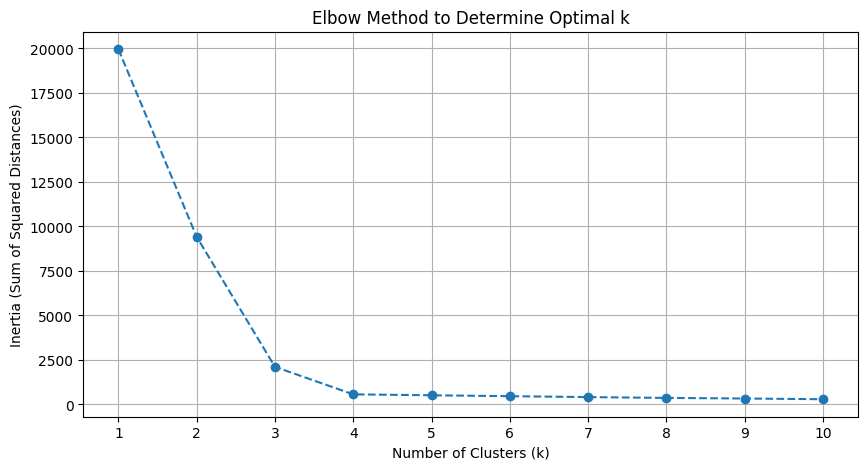

In [292]:
from sklearn.datasets import make_blobs 
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt 
# Generate synthetic data 
data, _ = make_blobs(n_samples=300, centers=4, random_state=42) 
# Apply the Elbow Method 
inertia = [] 
k_values = range(1, 11)  # Test k values from 1 to 10 
for k in k_values: 
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) 
    kmeans.fit(data) 
    inertia.append(kmeans.inertia_) 
# Plot the Elbow Method 
plt.figure(figsize=(10, 5)) 
plt.plot(k_values, inertia, marker='o', linestyle='--') 
plt.title("Elbow Method to Determine Optimal k") 
plt.xlabel("Number of Clusters (k)") 
plt.ylabel("Inertia (Sum of Squared Distances)") 
plt.xticks(k_values) 
plt.grid(True) 
plt.show() 

## Applications Hands-On Implementation 

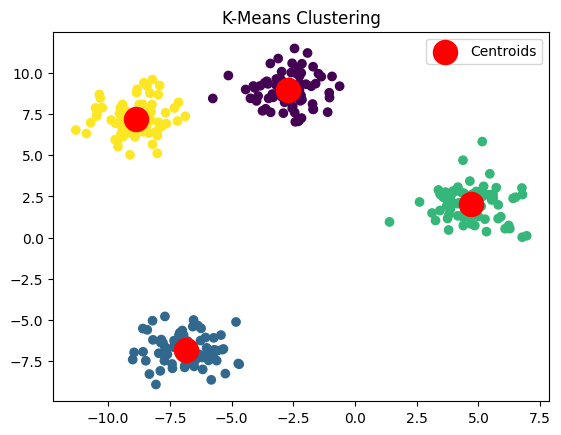

In [293]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Generate synthetic data
data, labels = make_blobs(n_samples=300, centers=4, random_state=42)
# Apply K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)
# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_, cmap="viridis")
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=300,
    c="red",
    label="Centroids",
)
plt.title("K-Means Clustering")
plt.legend()
plt.show()

## Implementation of K-Means

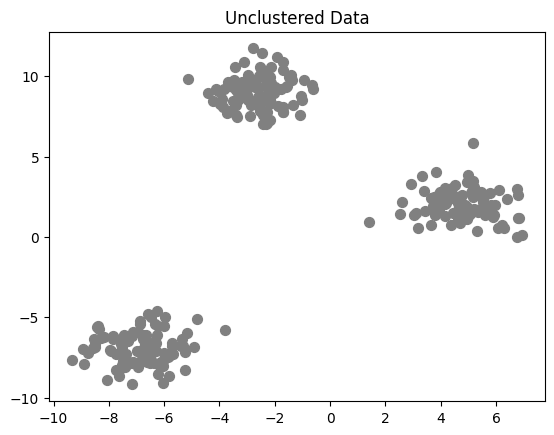

Initial Centroids:
 [[ 4.05051408  2.82277178]
 [-6.75933156 -6.36567076]
 [ 4.9208707   1.35047016]]
Converged at iteration 2


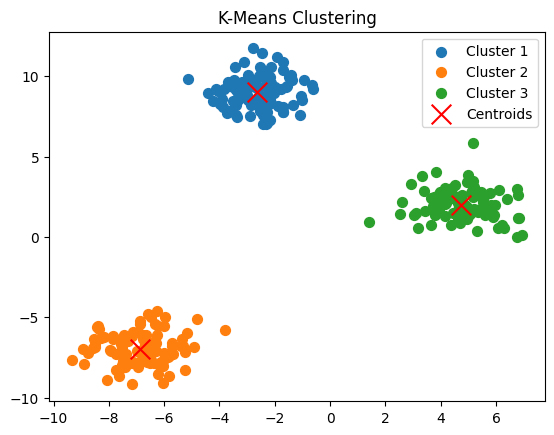

In [294]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# Generate synthetic data with 3 clusters
data, _ = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)
# Plot the data
plt.scatter(data[:, 0], data[:, 1], s=50, color="gray")
plt.title("Unclustered Data")
plt.show()

# Initialize Parameters
# Number of clusters
k = 3
# Number of iterations
max_iterations = 100
# Randomly initialize centroids
np.random.seed(42)
centroids = data[np.random.choice(data.shape[0], k, replace=False)]

print("Initial Centroids:\n", centroids)

# Assign Points to Clusters
# Use Euclidean distance to determine the closest centroid for each data point.
def assign_clusters(data, centroids): 
    distances = np.sqrt(((data - centroids[:, np.newaxis])**2).sum(axis=2)) 
    return np.argmin(distances, axis=0)


# Update Centroids
def update_centroids(data, labels, k):
    return np.array([data[labels == i].mean(axis=0) for i in range(k)])

# Iterative Optimization 
# Iteratively update clusters and centroids until convergence. 
for iteration in range(max_iterations): 
    # Assign points to clusters 
    labels = assign_clusters(data, centroids) 
    # Update centroids 
    new_centroids = update_centroids(data, labels, k) 
     
    # Check for convergence 
    if np.all(centroids == new_centroids): 
        print(f"Converged at iteration {iteration}") 
        break 
     
    centroids = new_centroids 

# Visualize the final clusters and centroids
for i in range(k): 
    plt.scatter(data[labels == i][:, 0], data[labels == i][:, 1], s=50, label=f"Cluster {i+1}") 
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='x', 
label='Centroids') 
plt.title("K-Means Clustering") 
plt.legend() 
plt.show() 

## Implementation Using Scikit learn

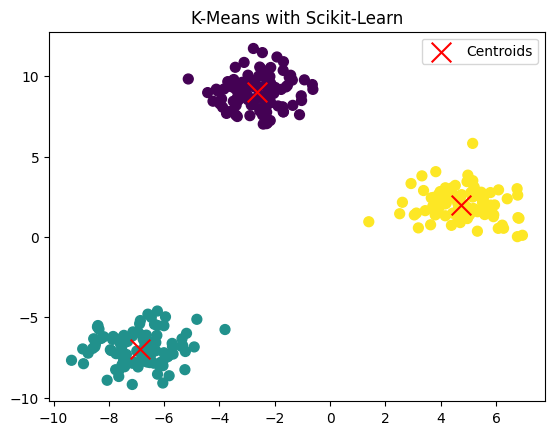

In [295]:
from sklearn.cluster import KMeans

# Initialize K-Means
kmeans = KMeans(
    n_clusters=k, init="k-means++", max_iter=300, n_init=10, random_state=42
)
labels = kmeans.fit_predict(data)
# Visualize results
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap="viridis", s=50)
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200,
    c="red",
    marker="x",
    label="Centroids",
)
plt.title("K-Means with Scikit-Learn")
plt.legend()
plt.show()

# Mini Challenge

## Importing Libraries

In [296]:
%pip install kagglehub

Note: you may need to restart the kernel to use updated packages.


In [297]:
import kagglehub
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

## Loading Dataset

In [298]:
# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Ahmed Mohiuddin Shah\.cache\kagglehub\datasets\unsdsn\world-happiness\versions\2


In [299]:
for file in os.listdir(path):
    if file.endswith(".csv"):
        print(file)

2015.csv
2016.csv
2017.csv
2018.csv
2019.csv


### 2015

In [300]:
# Load the dataset
file_path = os.path.join(path, "2015.csv")
data_2015 = pd.read_csv(file_path)
# Display the first few rows
data_2015.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


### Correlatiopn Matrix

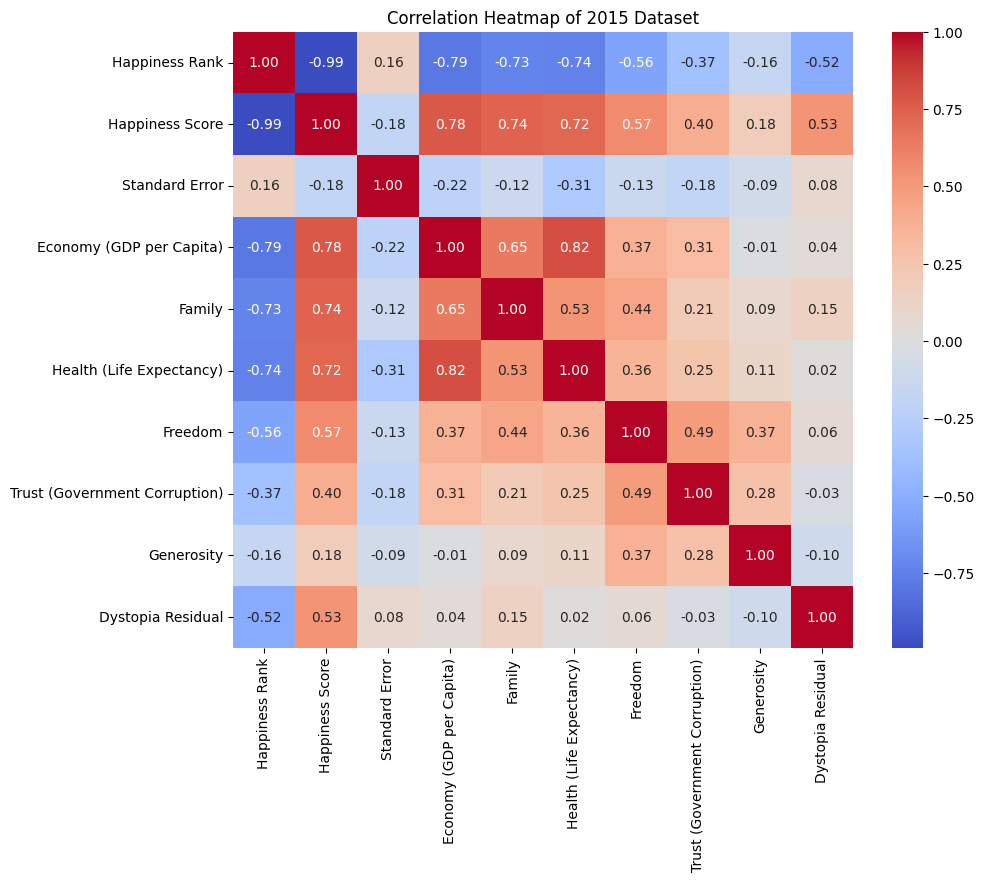

In [301]:
# Correlation Heatmap of 2015
plt.figure(figsize=(10, 8))
data_2015_numeric = data_2015.select_dtypes(include=[np.number])
corr = data_2015_numeric.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of 2015 Dataset")
plt.show()

- We can see that Happiness Rank And Happiness Score are Highly Correlated so we can drop Happiness Rank as it can be infered from Happiness Score

In [302]:
data_2015.drop(
    [
        "Region",
        "Happiness Rank",
        "Standard Error",
        "Family",
        "Dystopia Residual",
    ],
    axis=1,
    inplace=True,
)

In [303]:
# Rename the columns for easier access
data_2015.columns = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]
data_2015.head()

,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption
0,Switzerland,7.587,1.39651,0.94143,0.66557,0.41978,0.29678
1,Iceland,7.561,1.30232,0.94784,0.62877,0.14145,0.43630
2,Denmark,7.527,1.32548,0.87464,0.64938,0.48357,0.34139
3,Norway,7.522,1.45900,0.88521,0.66973,0.36503,0.34699
4,Canada,7.427,1.32629,0.90563,0.63297,0.32957,0.45811


### 2016

In [304]:
file_path = os.path.join(path, "2016.csv")
data_2016 = pd.read_csv(file_path)
# data_2016.head()
data_2016.drop(
    [
        "Region",
        "Happiness Rank",
        "Lower Confidence Interval",
        "Upper Confidence Interval",
        "Family",
        "Dystopia Residual",
    ],
    axis=1,
    inplace=True,
)
data_2016.columns = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]
data_2016.head()

,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption
0,Denmark,7.526,1.44178,0.79504,0.57941,0.44453,0.36171
1,Switzerland,7.509,1.52733,0.86303,0.58557,0.41203,0.28083
2,Iceland,7.501,1.42666,0.86733,0.56624,0.14975,0.47678
3,Norway,7.498,1.57744,0.79579,0.59609,0.35776,0.37895
4,Finland,7.413,1.40598,0.81091,0.57104,0.41004,0.25492


### 2017

In [305]:
file_path = os.path.join(path, "2017.csv")
data_2017 = pd.read_csv(file_path)
data_2017.drop(
    [
        "Happiness.Rank",
        "Whisker.high",
        "Whisker.low",
        "Family",
        "Dystopia.Residual",
    ],
    axis=1,
    inplace=True,
)
data_2017.columns = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]
data_2017.head()

,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption
0,Norway,7.537,1.616463,0.796667,0.635423,0.362012,0.315964
1,Denmark,7.522,1.482383,0.792566,0.626007,0.355280,0.400770
2,Iceland,7.504,1.480633,0.833552,0.627163,0.475540,0.153527
3,Switzerland,7.494,1.564980,0.858131,0.620071,0.290549,0.367007
4,Finland,7.469,1.443572,0.809158,0.617951,0.245483,0.382612


### 2018

In [306]:
file_path = os.path.join(path, "2018.csv")
data_2018 = pd.read_csv(file_path)
data_2018.drop(
    [
        "Overall rank",
        "Social support",
    ],
    axis=1,
    inplace=True,
)
data_2018.columns = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]

data_2018.head()

,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption
0,Finland,7.632,1.305,0.874,0.681,0.202,0.393
1,Norway,7.594,1.456,0.861,0.686,0.286,0.340
2,Denmark,7.555,1.351,0.868,0.683,0.284,0.408
3,Iceland,7.495,1.343,0.914,0.677,0.353,0.138
4,Switzerland,7.487,1.420,0.927,0.660,0.256,0.357


### 2019

In [307]:
file_path = os.path.join(path, "2019.csv")
data_2019 = pd.read_csv(file_path)
data_2019.drop(
    [
        "Overall rank",
        "Social support",
    ],
    axis=1,
    inplace=True,
)
data_2019.columns = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]
data_2019.head()

,Country,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption
0,Finland,7.769,1.340,0.986,0.596,0.153,0.393
1,Denmark,7.600,1.383,0.996,0.592,0.252,0.410
2,Norway,7.554,1.488,1.028,0.603,0.271,0.341
3,Iceland,7.494,1.380,1.026,0.591,0.354,0.118
4,Netherlands,7.488,1.396,0.999,0.557,0.322,0.298


### Combining The Data

In [308]:
# combine all data
data = pd.concat([data_2015, data_2016, data_2017, data_2018, data_2019])

## Exploring DataSet

### Handling Missing Values

In [309]:
# Check for missing values
data.isnull().sum()

Country                         0
Happiness Score                 0
GDP per Capita                  0
Life Expectancy                 0
Freedom to Make Life Choices    0
Generosity                      0
Perception of Corruption        1
dtype: int64

In [310]:
# Check Shape
data.shape

(782, 7)

- We can drop the one missing value row as it won't have much effect onn the final result

In [311]:
# drop the missing values
data.dropna(inplace=True)
data.shape

(781, 7)

### Handling Duplicates

In [312]:
# Check Duplicate Rows
data.duplicated().sum()

np.int64(0)

### Feature Selection

In [313]:
# Feature Selection
features = [
    "Country",
    "Happiness Score",
    "GDP per Capita",
    "Life Expectancy",
    "Freedom to Make Life Choices",
    "Generosity",
    "Perception of Corruption",
]

### Standarizing

In [314]:
X = data[features].copy()

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X.iloc[:, 1:])
X_scaled

array([[ 1.96188502,  1.18963704,  1.32536467,  1.66423654,  2.02546794,
         1.03074453],
       [ 1.9388016 ,  0.95715133,  1.35118021,  1.42341883, -0.31118425,
         2.12649001],
       [ 1.90861559,  1.01431631,  1.05637564,  1.55828983,  2.56100145,
         1.38109721],
       ...,
       [-1.93033488, -1.39342504, -1.01225036, -2.69122663, -0.17224273,
        -1.10372873],
       [-2.03687374, -2.1931423 , -2.0432609 , -1.21883573,  0.47419215,
        -1.02519193],
       [-2.24107323, -1.50202862, -1.27805777, -2.62578703,  0.19714863,
        -0.58538583]])

## Using Elbow method to find Optimal K

In [315]:
# Elbow Method for K-Means
inertia = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

#### Visualizing

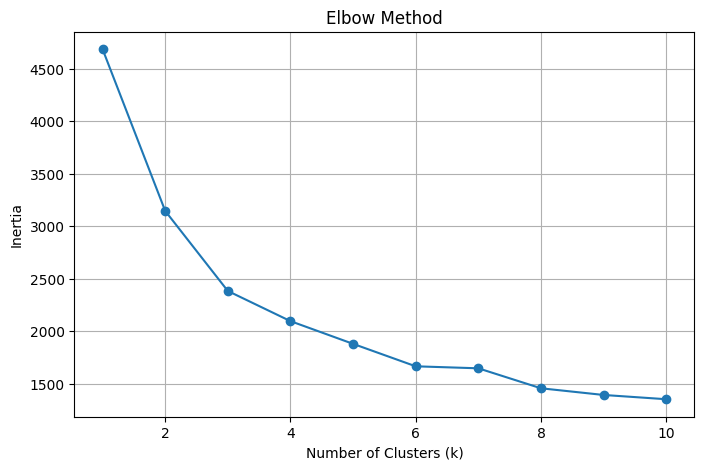

In [316]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker="o")
plt.title("Elbow Method")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.grid()
plt.show()

## Getting Labels Using K-Means Clustering

- We found elbow point at `k=3`

In [317]:
# K-Means Clustering
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)
# print(kmeans_labels)

In [318]:
# add cluster labels to the dataframe
X["Cluster"] = kmeans_labels

#### Visualizing Clusters

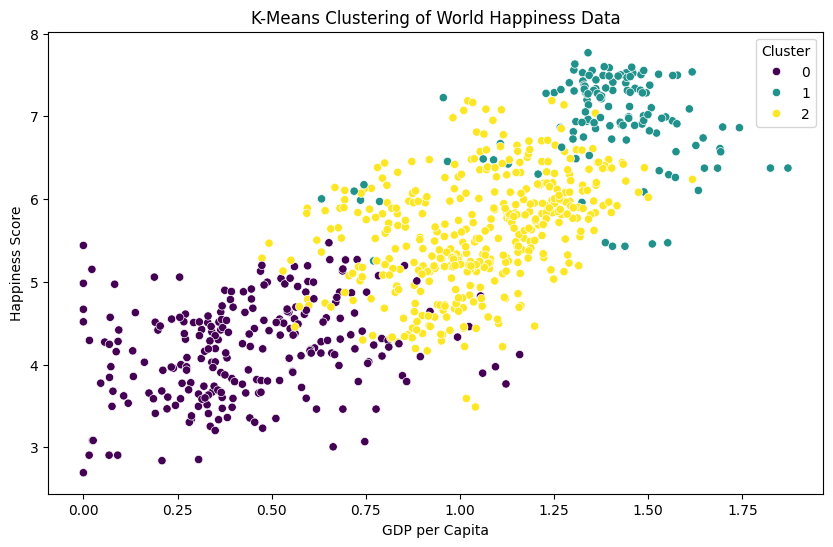

In [319]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x="GDP per Capita",
    y="Happiness Score",
    hue="Cluster",
    data=X,
    palette="viridis",
    legend="full",
)
plt.title("K-Means Clustering of World Happiness Data")
plt.xlabel("GDP per Capita")
plt.ylabel("Happiness Score")
plt.show()

## Dimensionality Reduction with PCA

In [320]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

## Visualize K-Means Clusters

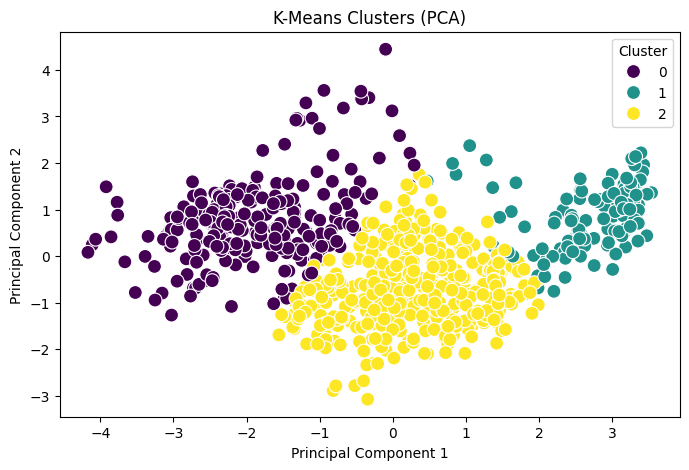

In [321]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans_labels, palette="viridis", s=100
)
plt.title("K-Means Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## DBSCAN Clustering

In [322]:
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)

In [323]:
# Add DBSCAN labels to the dataframe
X["DBSCAN Cluster"] = dbscan_labels

### Visualize DBSCAN Clusters

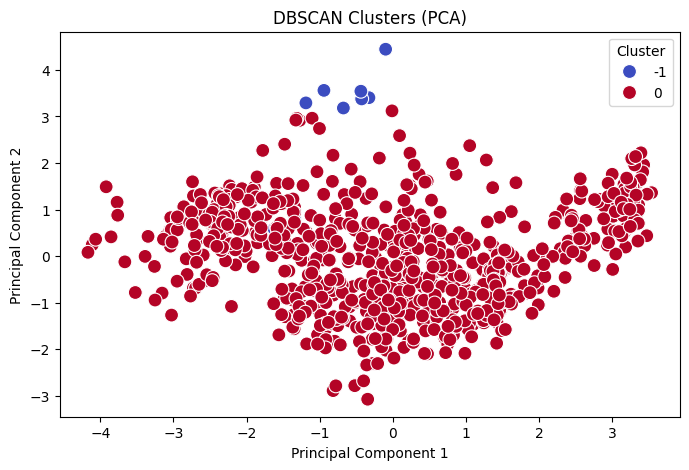

In [324]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="coolwarm", s=100
)
plt.title("DBSCAN Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### Fine tuning DBSCAN

- Elbow point is around `1.46`
- min_samples is `7 features + 1 = 8`

Epsilon at Elbow Point:
1.4622016452235413


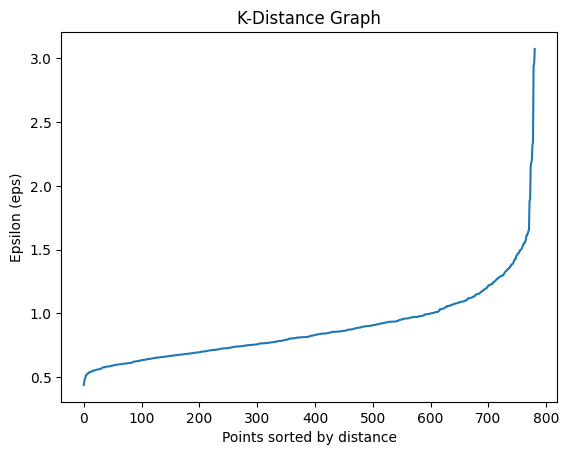

In [325]:
# Compute the k-distance graph
neighbors = NearestNeighbors(n_neighbors=5)
neighbors_fit = neighbors.fit(X_scaled)
distances, _ = neighbors_fit.kneighbors(X_scaled)
# Sort distances and plot
distances = np.sort(distances[:, -1])

# Elbow Point is at the 750th point
print("Epsilon at Elbow Point:")
print(distances[750])

plt.plot(distances)
plt.title("K-Distance Graph")
plt.xlabel("Points sorted by distance")
plt.ylabel("Epsilon (eps)")
plt.show()

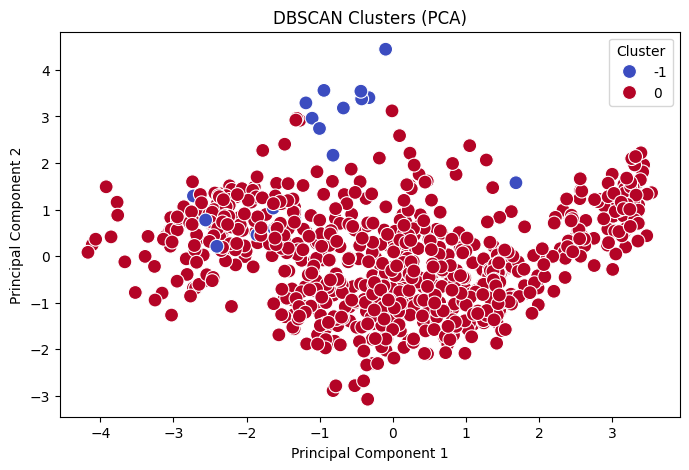

In [326]:
dbscan = DBSCAN(eps=1.46, min_samples=7)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Add DBSCAN labels to the dataframe
X["DBSCAN Cluster"] = dbscan_labels

plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=dbscan_labels, palette="coolwarm", s=100
)
plt.title("DBSCAN Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

### Visualizing Noise

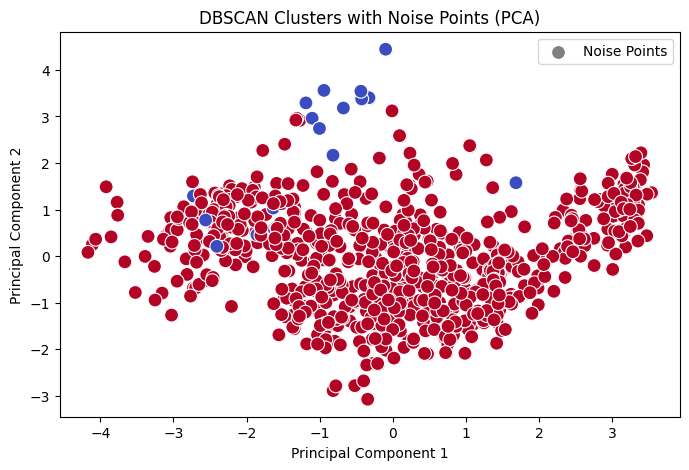

In [327]:
# Visualizing the noise points
noise_points = X[X["DBSCAN Cluster"] == -1]
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], color="gray", s=100, label="Noise Points"
)
sns.scatterplot(
    x=X_pca[:, 0],
    y=X_pca[:, 1],
    hue=dbscan_labels,
    palette="coolwarm",
    s=100,
    legend=False,
)
plt.title("DBSCAN Clusters with Noise Points (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()

## HDBSCAN Clustering

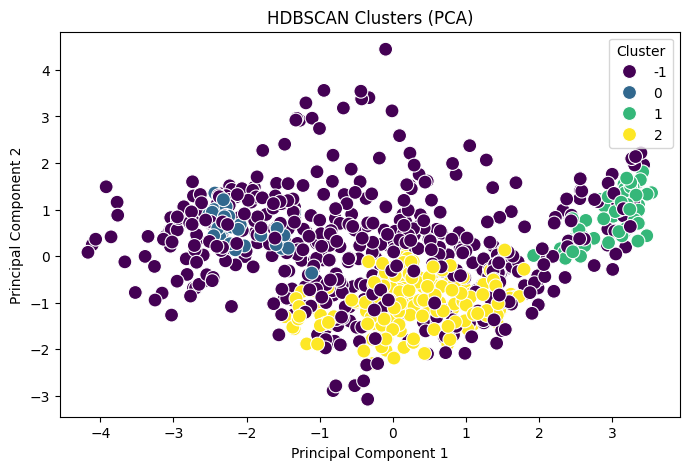

In [328]:
hdb = hdbscan.HDBSCAN(min_cluster_size=3, min_samples=8)
hdb_labels = hdb.fit_predict(X_scaled)
y_hdb = hdb.labels_

# Add HDBSCAN labels to the dataframe
X["HDBSCAN Cluster"] = hdb_labels

# Visualize HDBSCAN Clusters
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x=X_pca[:, 0], y=X_pca[:, 1], hue=hdb_labels, palette="viridis", s=100
)
plt.title("HDBSCAN Clusters (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.show()

## Analysizing Clusters Questions/Answers

#### What socio-economic patterns define each cluster? 

In [329]:
# Analyze socio-economic indicators per cluster
print("\nK-Means Cluster Analysis:")
X.drop(columns=["Country"]).groupby("Cluster").mean()



K-Means Cluster Analysis:


,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption,DBSCAN Cluster,HDBSCAN Cluster
Cluster,,,,,,,,
0,4.176645,0.436995,0.316958,0.342275,0.187531,0.166211,-0.070248,-0.876033
1,6.939271,1.388565,0.860508,0.579557,0.308197,0.319595,-0.007752,-0.085271
2,5.594400,1.047257,0.708609,0.399014,0.132394,0.116667,0.000000,0.309756


In [330]:
print("\nDBSCAN Cluster Analysis:")
X.drop(columns=["Country"]).groupby("DBSCAN Cluster").mean()


DBSCAN Cluster Analysis:


,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption,Cluster,HDBSCAN Cluster
DBSCAN Cluster,,,,,,,,
-1,3.924389,0.463815,0.463404,0.34399,0.375962,0.345999,0.055556,-1.000000
0,5.411506,0.925170,0.615855,0.41284,0.173859,0.161279,1.242464,-0.102228


In [331]:
print("\nHDBSCAN Cluster Analysis:")
X.drop(columns=["Country"]).groupby("HDBSCAN Cluster").mean()


HDBSCAN Cluster Analysis:


,Happiness Score,GDP per Capita,Life Expectancy,Freedom to Make Life Choices,Generosity,Perception of Corruption,Cluster,DBSCAN Cluster
HDBSCAN Cluster,,,,,,,,
-1,5.131316,0.835857,0.560818,0.400186,0.185166,0.177181,1.037037,-0.035088
0,4.269133,0.357333,0.295139,0.367426,0.172727,0.109328,0.000000,0.000000
1,7.235271,1.421072,0.882348,0.600196,0.320822,0.325272,1.000000,0.000000
2,5.655296,1.066454,0.724172,0.388041,0.113527,0.088934,2.000000,0.000000


- K-Means Cluster Analysis
    - Cluster 0:
        - This cluster seems to group countries with low happiness and economic development, possibly lower-middle-income countries or those facing socio-economic challenges.
    - Cluster 1:
        - Represents economically prosperous countries with better living standards, likely high-income regions.
    - Cluster 2:
        - Represents middle-income countries with moderate happiness and socio-economic indicators.

- DBSCAN Cluster Analysis:
    - Cluster -1:
        - This cluster groups countries as outliers, likely those with significant socio-economic challenges.
    - Cluster 0:
        - Groups countries with moderate socio-economic indicators, likely emerging economies or stable low-middle-income countries.

- HDBSCAN Cluster Analysis
    - Cluster -1 (Outliers):
        - Captures ambiguous or edge-case countries that don't fit well into other clusters.
    - Cluster 0:
        - Represents the least developed and least happy countries.
    - Cluster 1:
        - This cluster represents the most prosperous and happiest countries globally.
    - Cluster 2:
        - Groups countries with moderate happiness and good economic conditions but low generosity and corruption perception scores.

- Key Observations
    - K-Means tends to group countries based on clear economic and happiness differences.
    - DBSCAN identifies a cluster of outliers (Cluster -1) with low happiness and economic performance, highlighting countries that might need targeted socio-economic interventions.
    - HDBSCAN provides fine-grained clusters, particularly useful for distinguishing the happiest countries (Cluster 1) and low performers (Cluster 0).
    - Patterns indicate that GDP per capita and life expectancy strongly influence happiness, while generosity and corruption perception have less impact in differentiating clusters.

#### Are there surprising countries in a cluster? Why might they be grouped this way? 

##### K-means
- Cluster 1 and 2 have some outlier countries as seen from box plot
- Cluster 0 (242 countries): Moderate happiness despite high GDP. Surprises: Wealthy but unhappy or poor but happy countries.
- Cluster 1 (129 countries): High happiness and income. Surprises: Low-income countries scoring high on happiness.
- Cluster 2 (410 countries): Low happiness/income. Surprises: Wealthy or well-governed nations appearing here.


K-Means Cluster Countries:
Cluster 0: 242
Cluster 1: 129
Cluster 2: 410


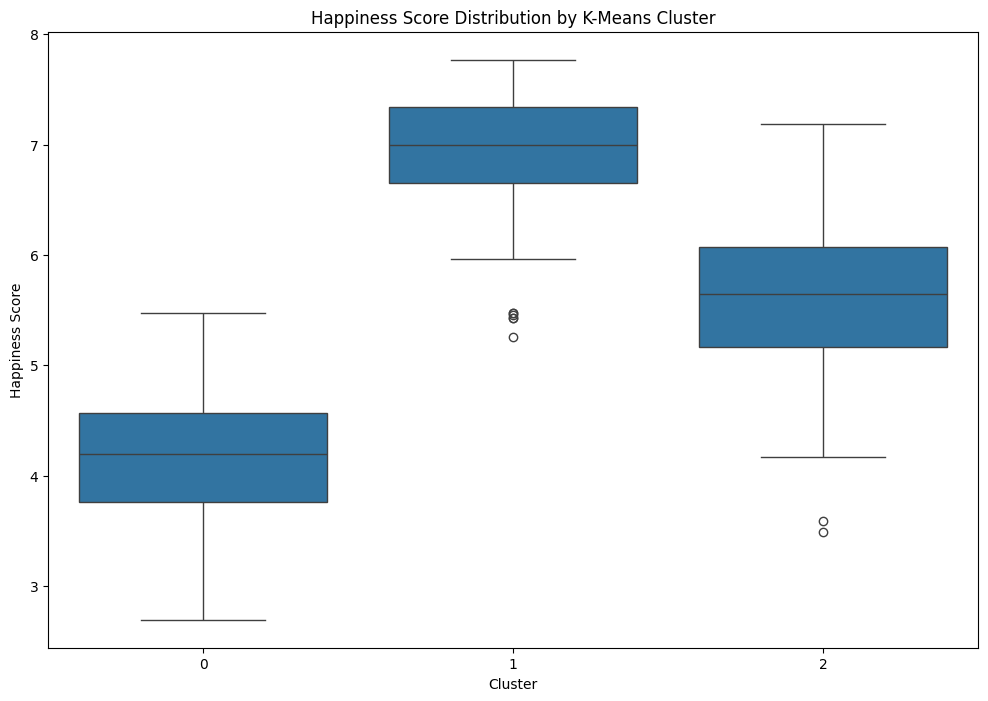

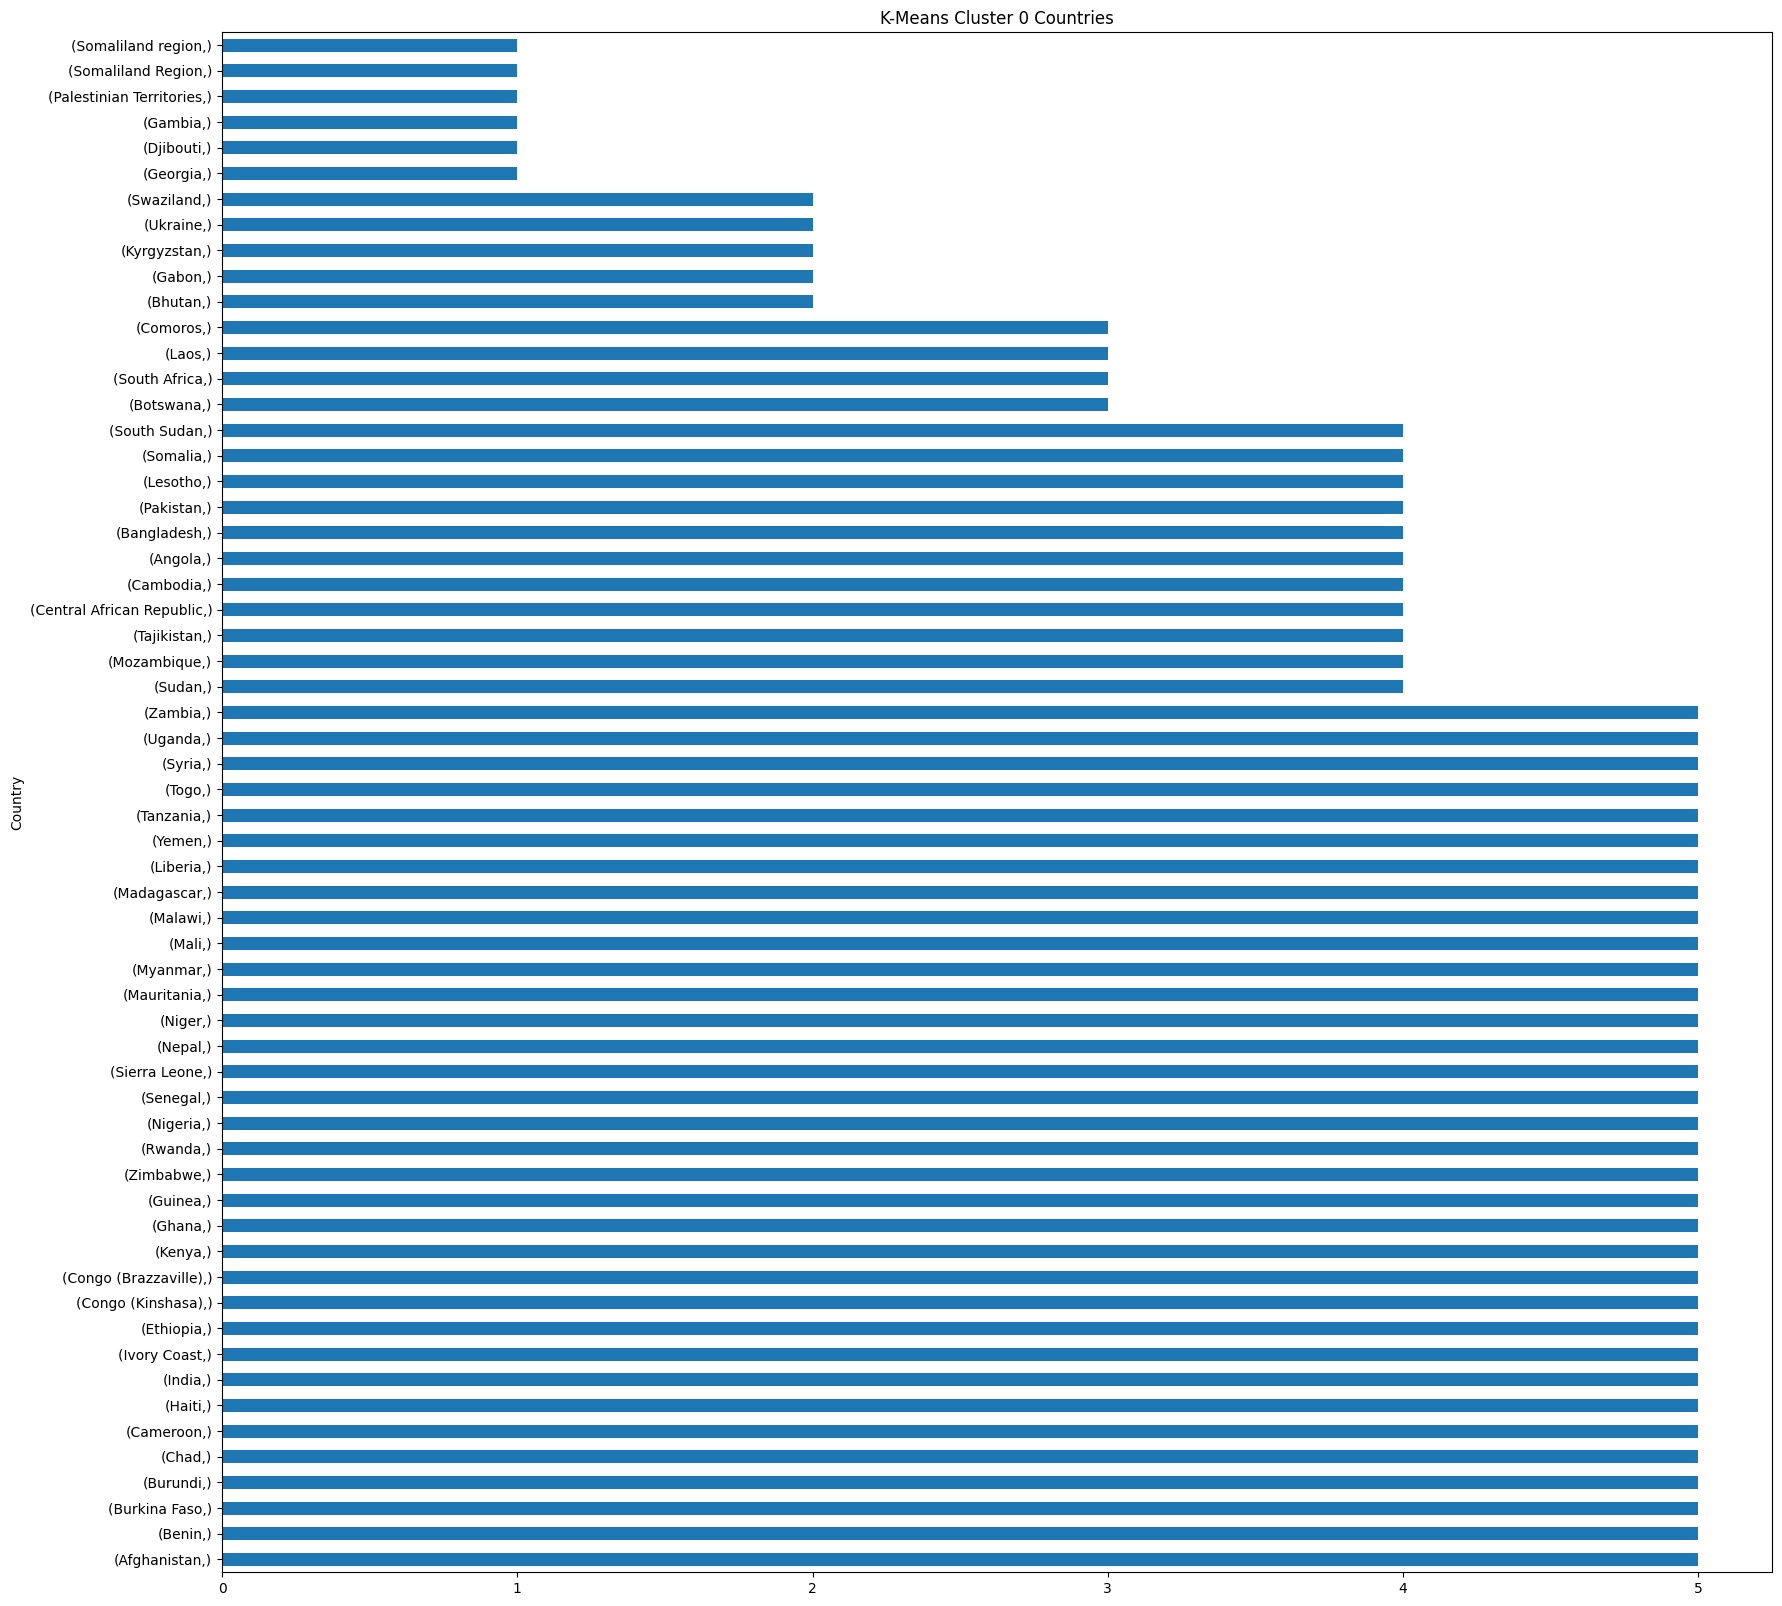

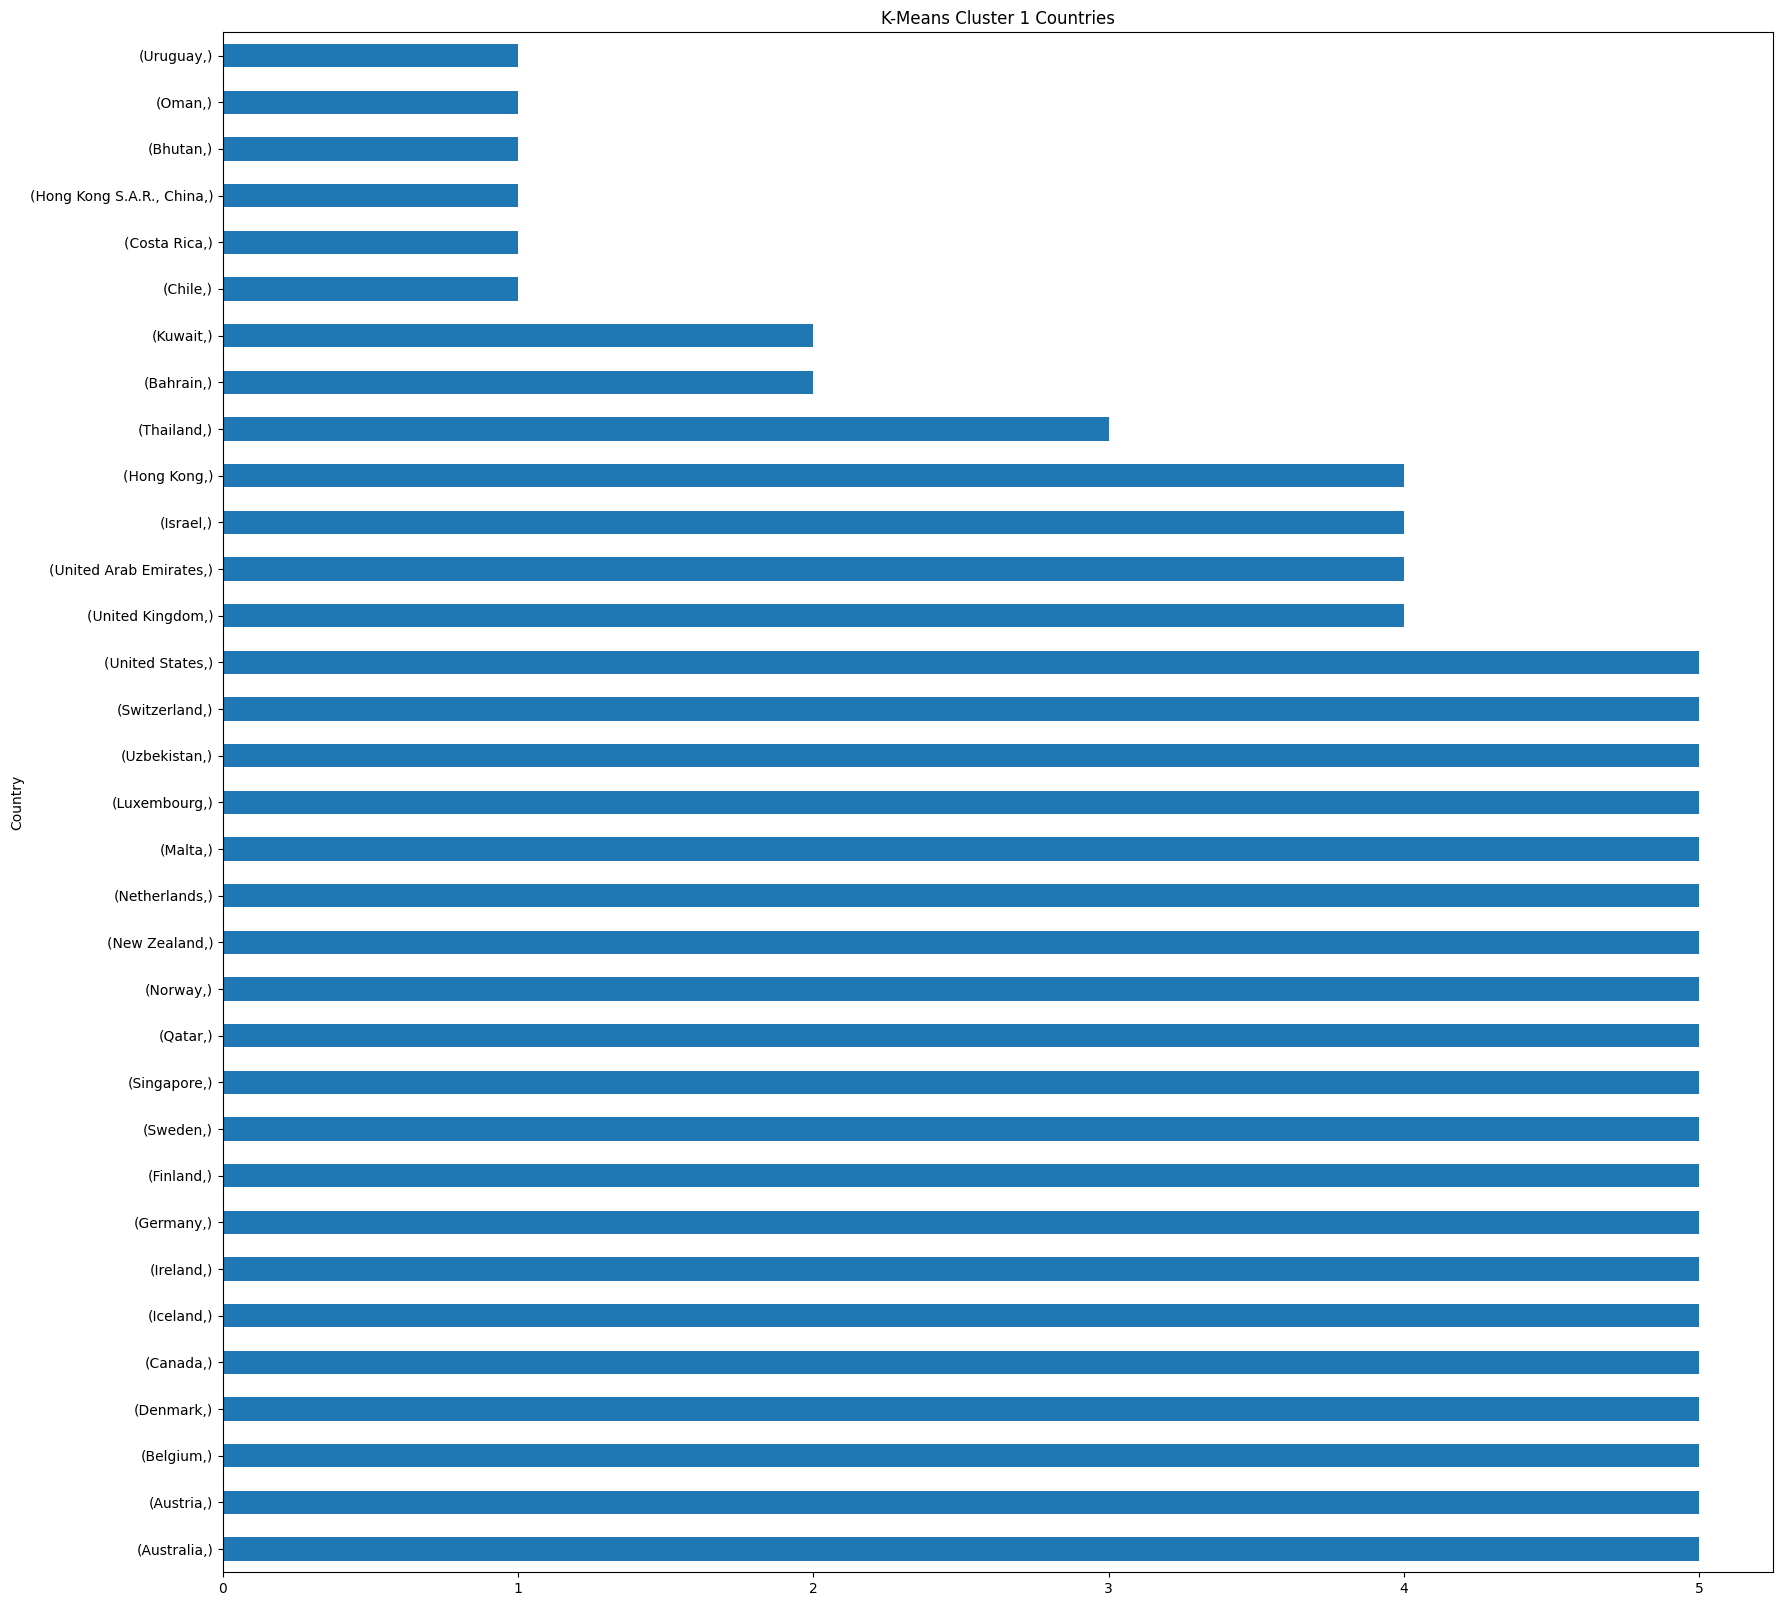

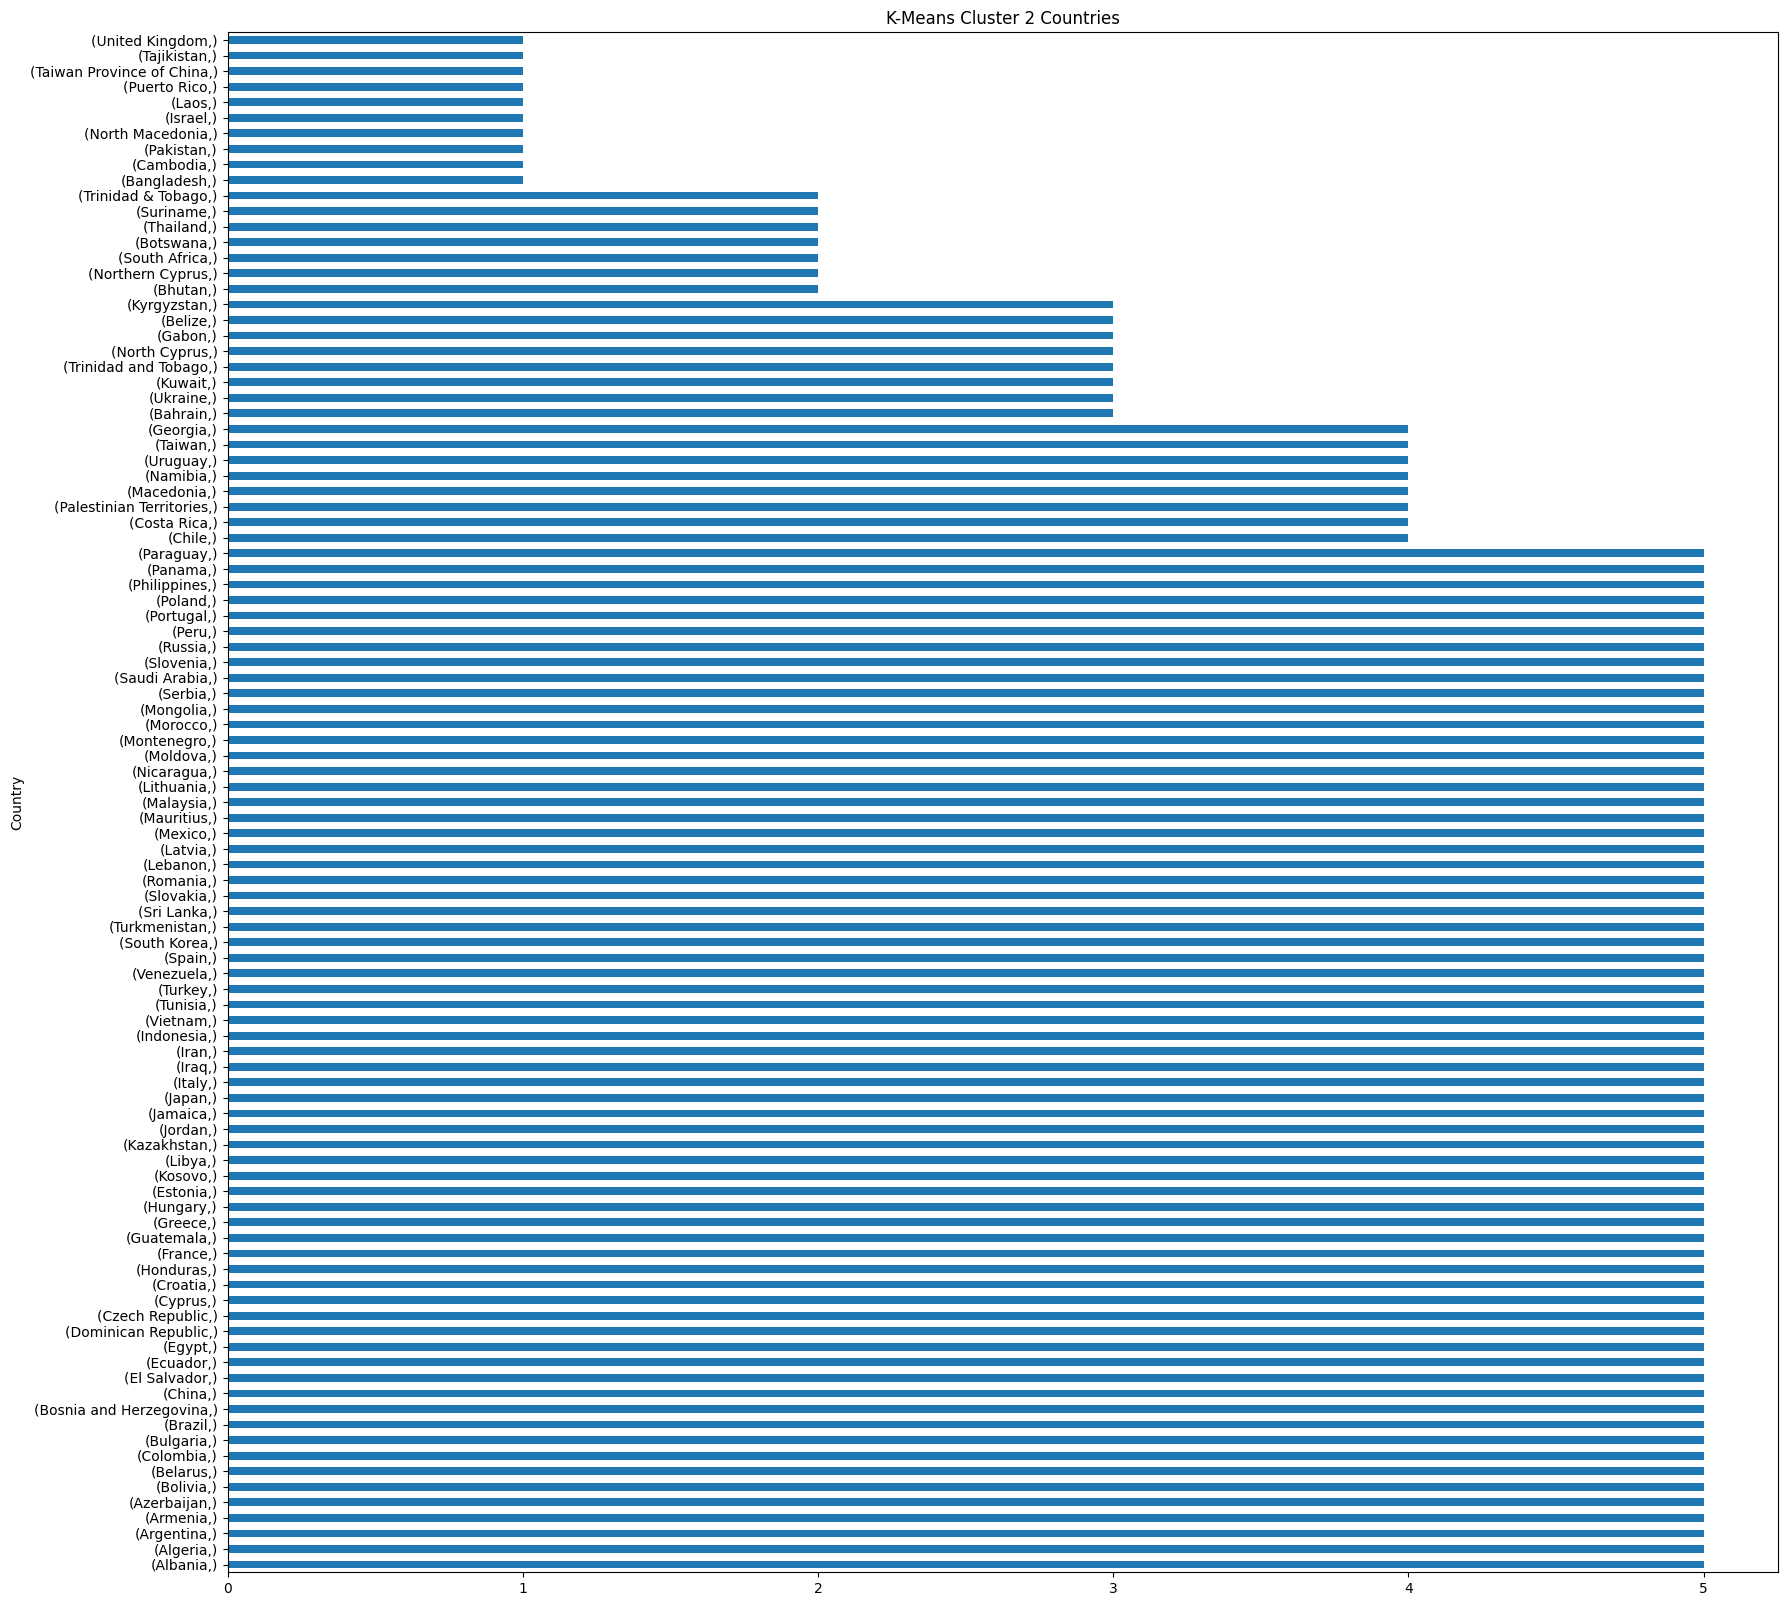

In [332]:
# Countrires in each cluster
print("\nK-Means Cluster Countries:")
# coounts in each cluster
for i in np.unique(kmeans_labels):
    print(f"Cluster {i}: {len(X[X['Cluster'] == i]['Country'].values)}")
#box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="Cluster", y="Happiness Score", data=X)
plt.title("Happiness Score Distribution by K-Means Cluster")
plt.show()
for i in np.unique(kmeans_labels):
    plt.figure(1, figsize=(20, 20))
    X_kmeans = X[X["Cluster"] == i][["Country"]].value_counts().plot(kind="barh")
    plt.title(f"K-Means Cluster {i} Countries")
    plt.show()


##### DBSCAN
- Cluster 2 has some outlier countries as seen from box plot.
- Cluster -1 (18 countries): Noise. Surprises: Balanced countries excluded from clusters.
- Cluster 0 (763 countries): Large, diverse. Surprises: Outliers like high GDP but low happiness.


DBSCAN Cluster Countries:
Cluster -1: 18 countries
Cluster 0: 763 countries


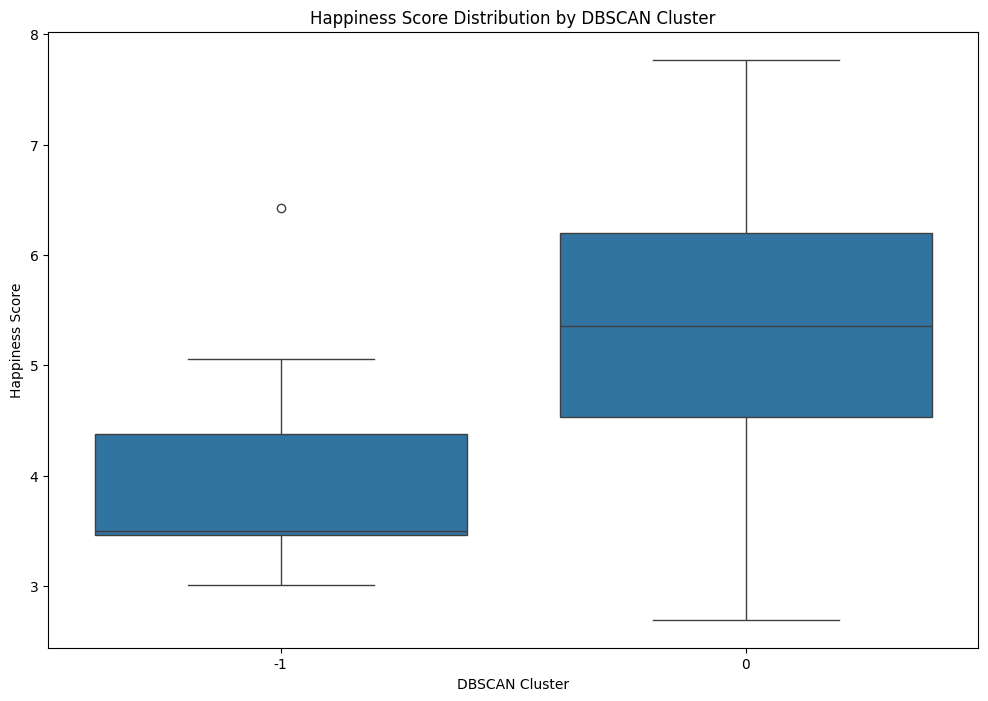

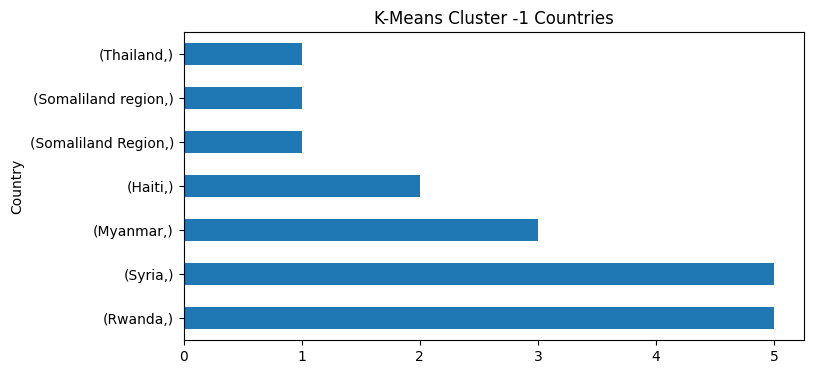

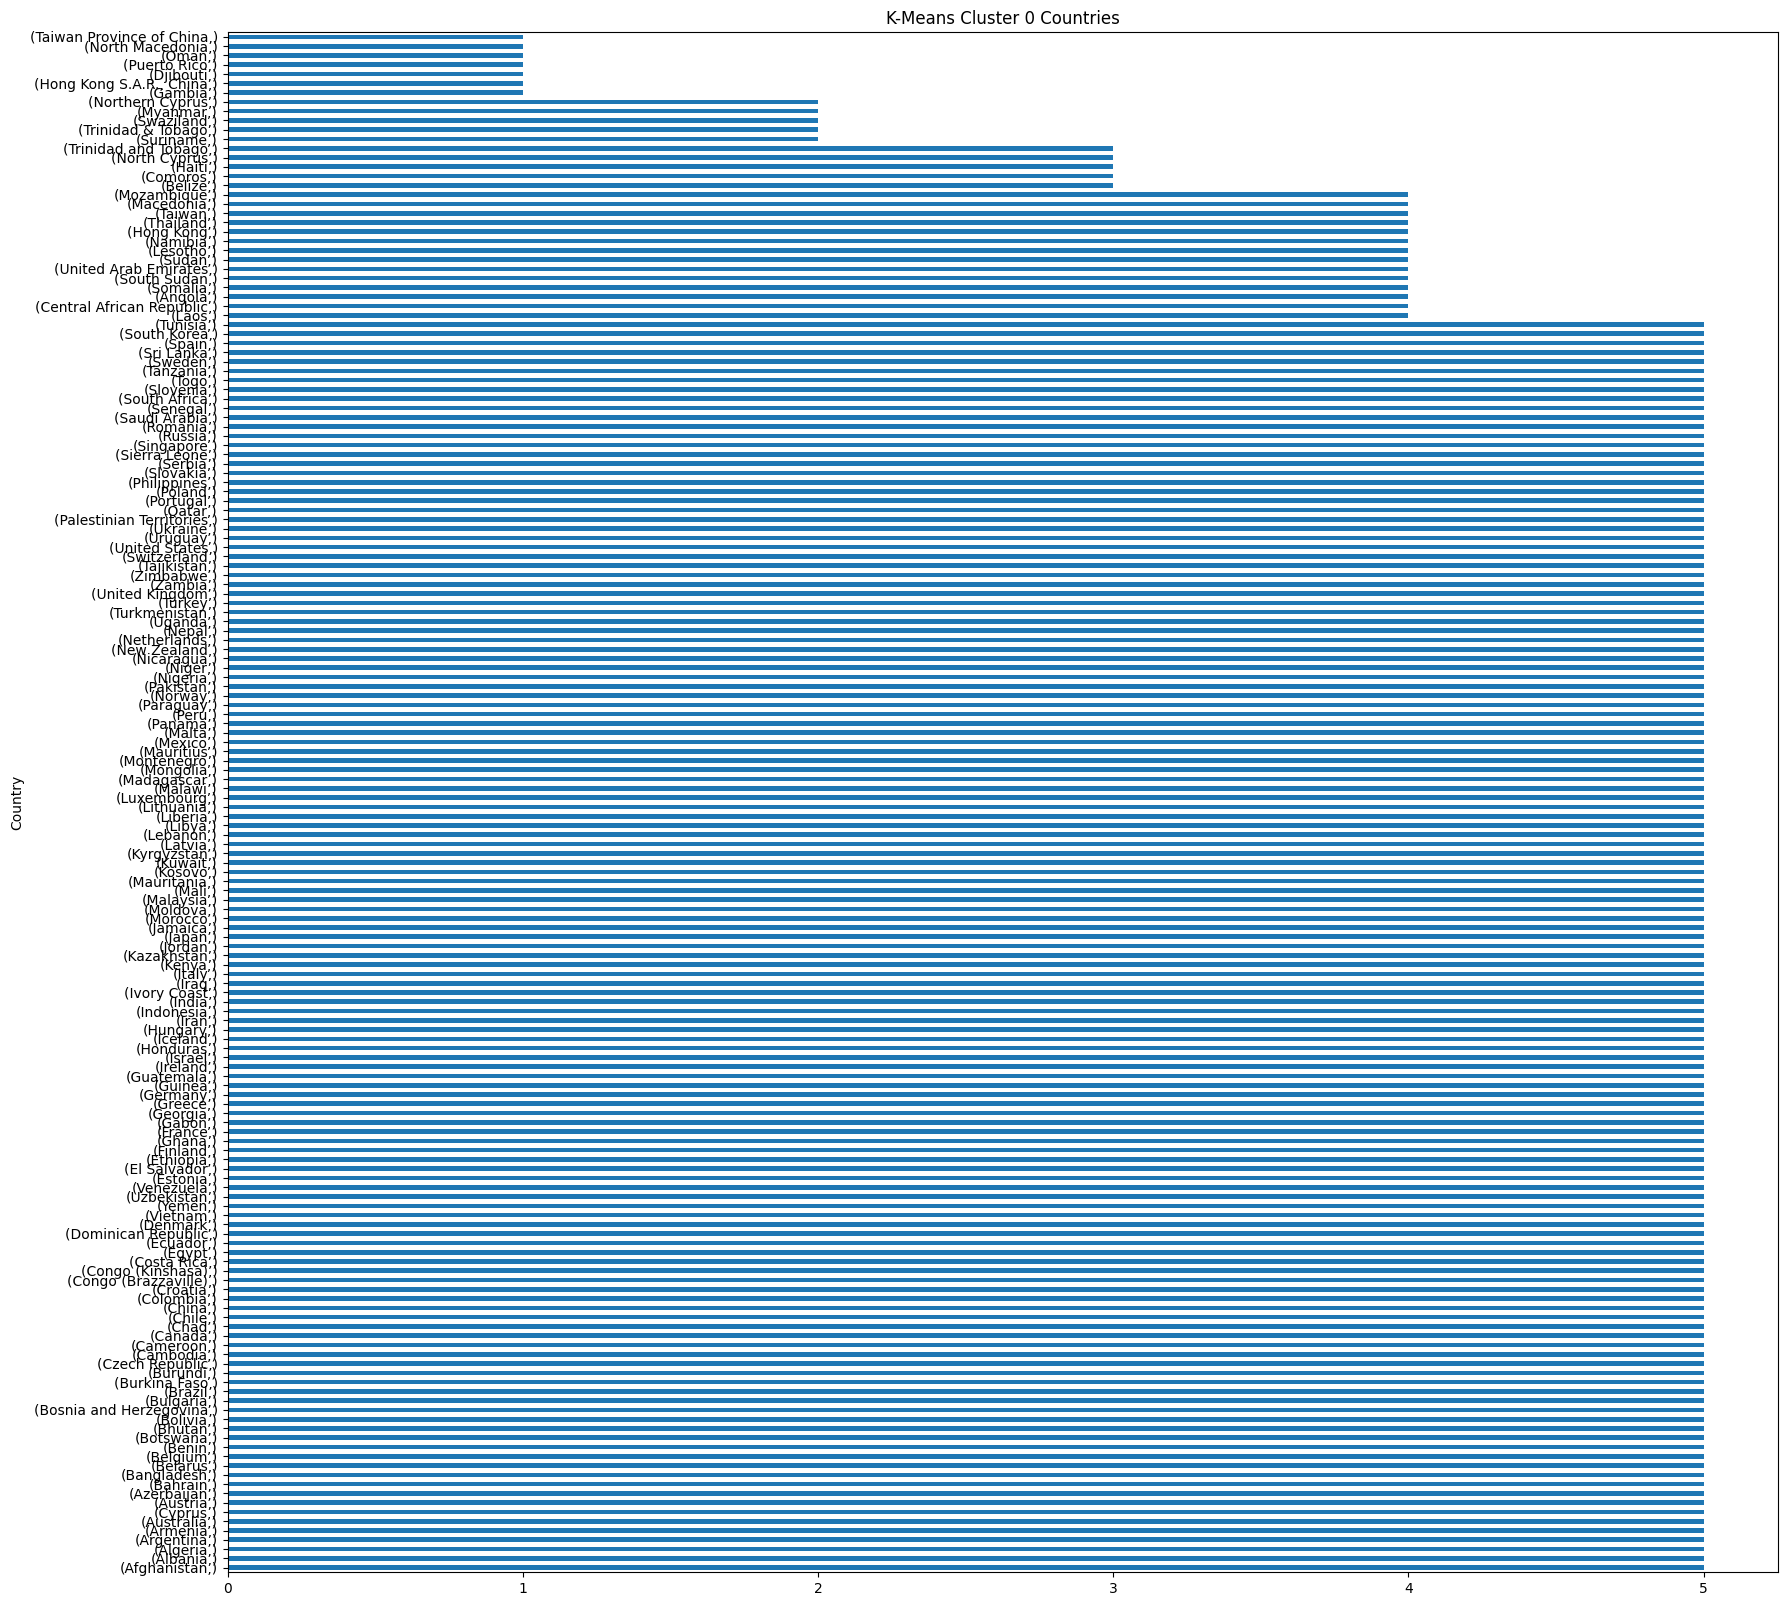

In [333]:
print("\nDBSCAN Cluster Countries:")
# coounts in each cluster
for i in np.unique(dbscan_labels):
    print(f"Cluster {i}: {np.sum(dbscan_labels == i)} countries")

#box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="DBSCAN Cluster", y="Happiness Score", data=X)
plt.title("Happiness Score Distribution by DBSCAN Cluster")
plt.show()

for i in np.unique(dbscan_labels):
    if i == -1:
        plt.figure(1, figsize=(8,4))   
    else:
        plt.figure(1, figsize=(20, 20))
    X_kmeans = X[X["DBSCAN Cluster"] == i][["Country"]].value_counts().plot(kind="barh")
    plt.title(f"K-Means Cluster {i} Countries")
    plt.show()

##### HDBSCAN
- From box plot we can see that there are no outliers in clusters.


HDBSCAN Cluster Countries:
Cluster -1 Count: 513
Cluster 0 Count: 30
Cluster 1 Count: 59
Cluster 2 Count: 179


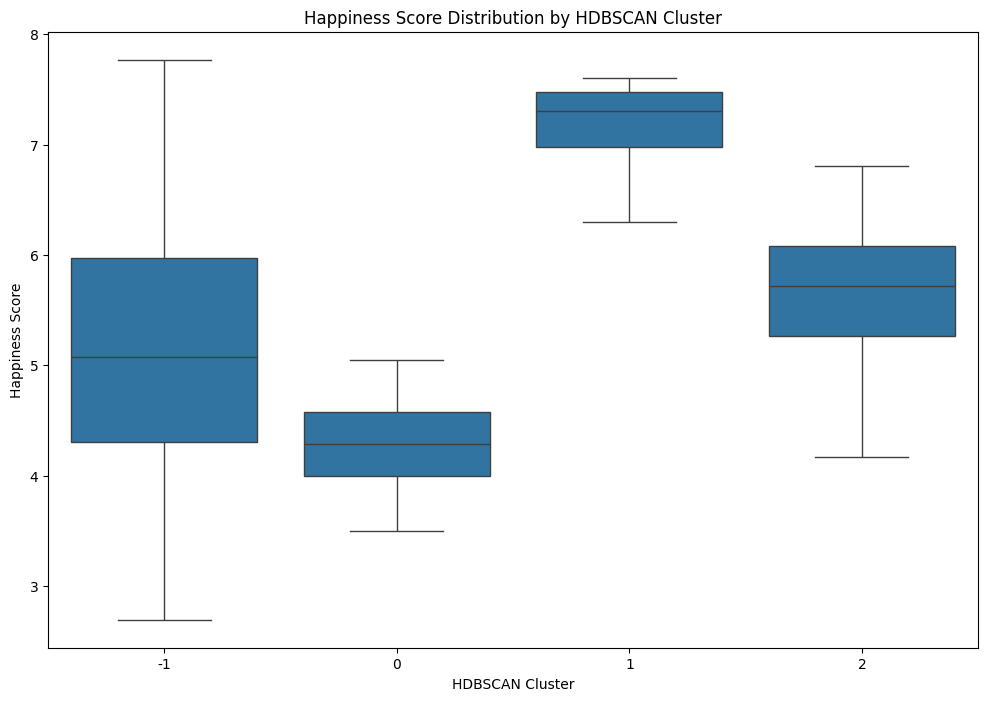

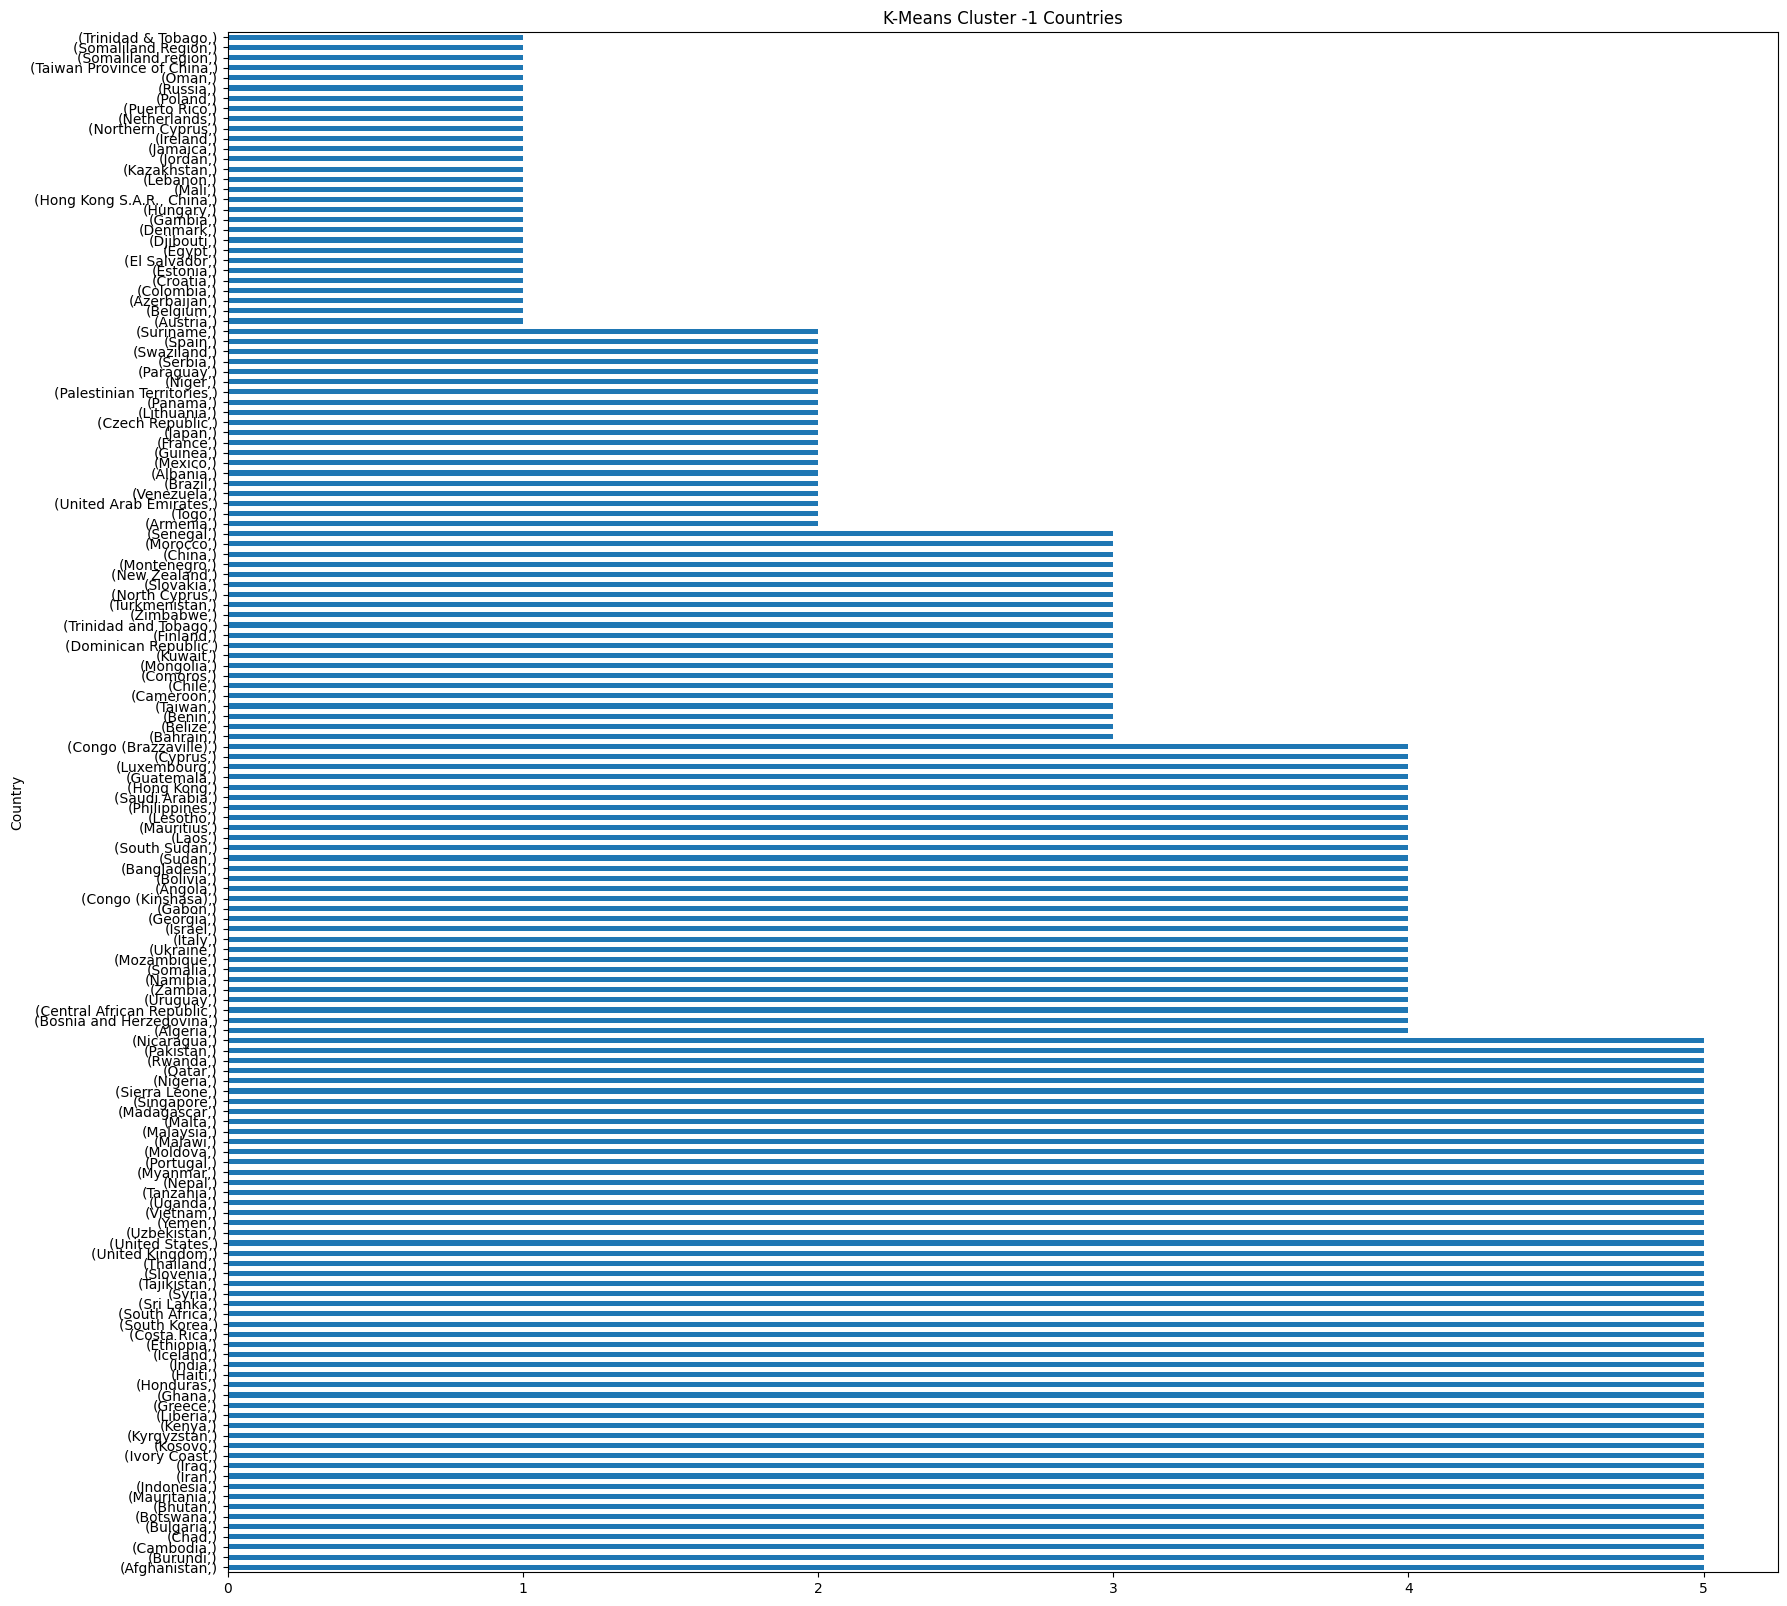

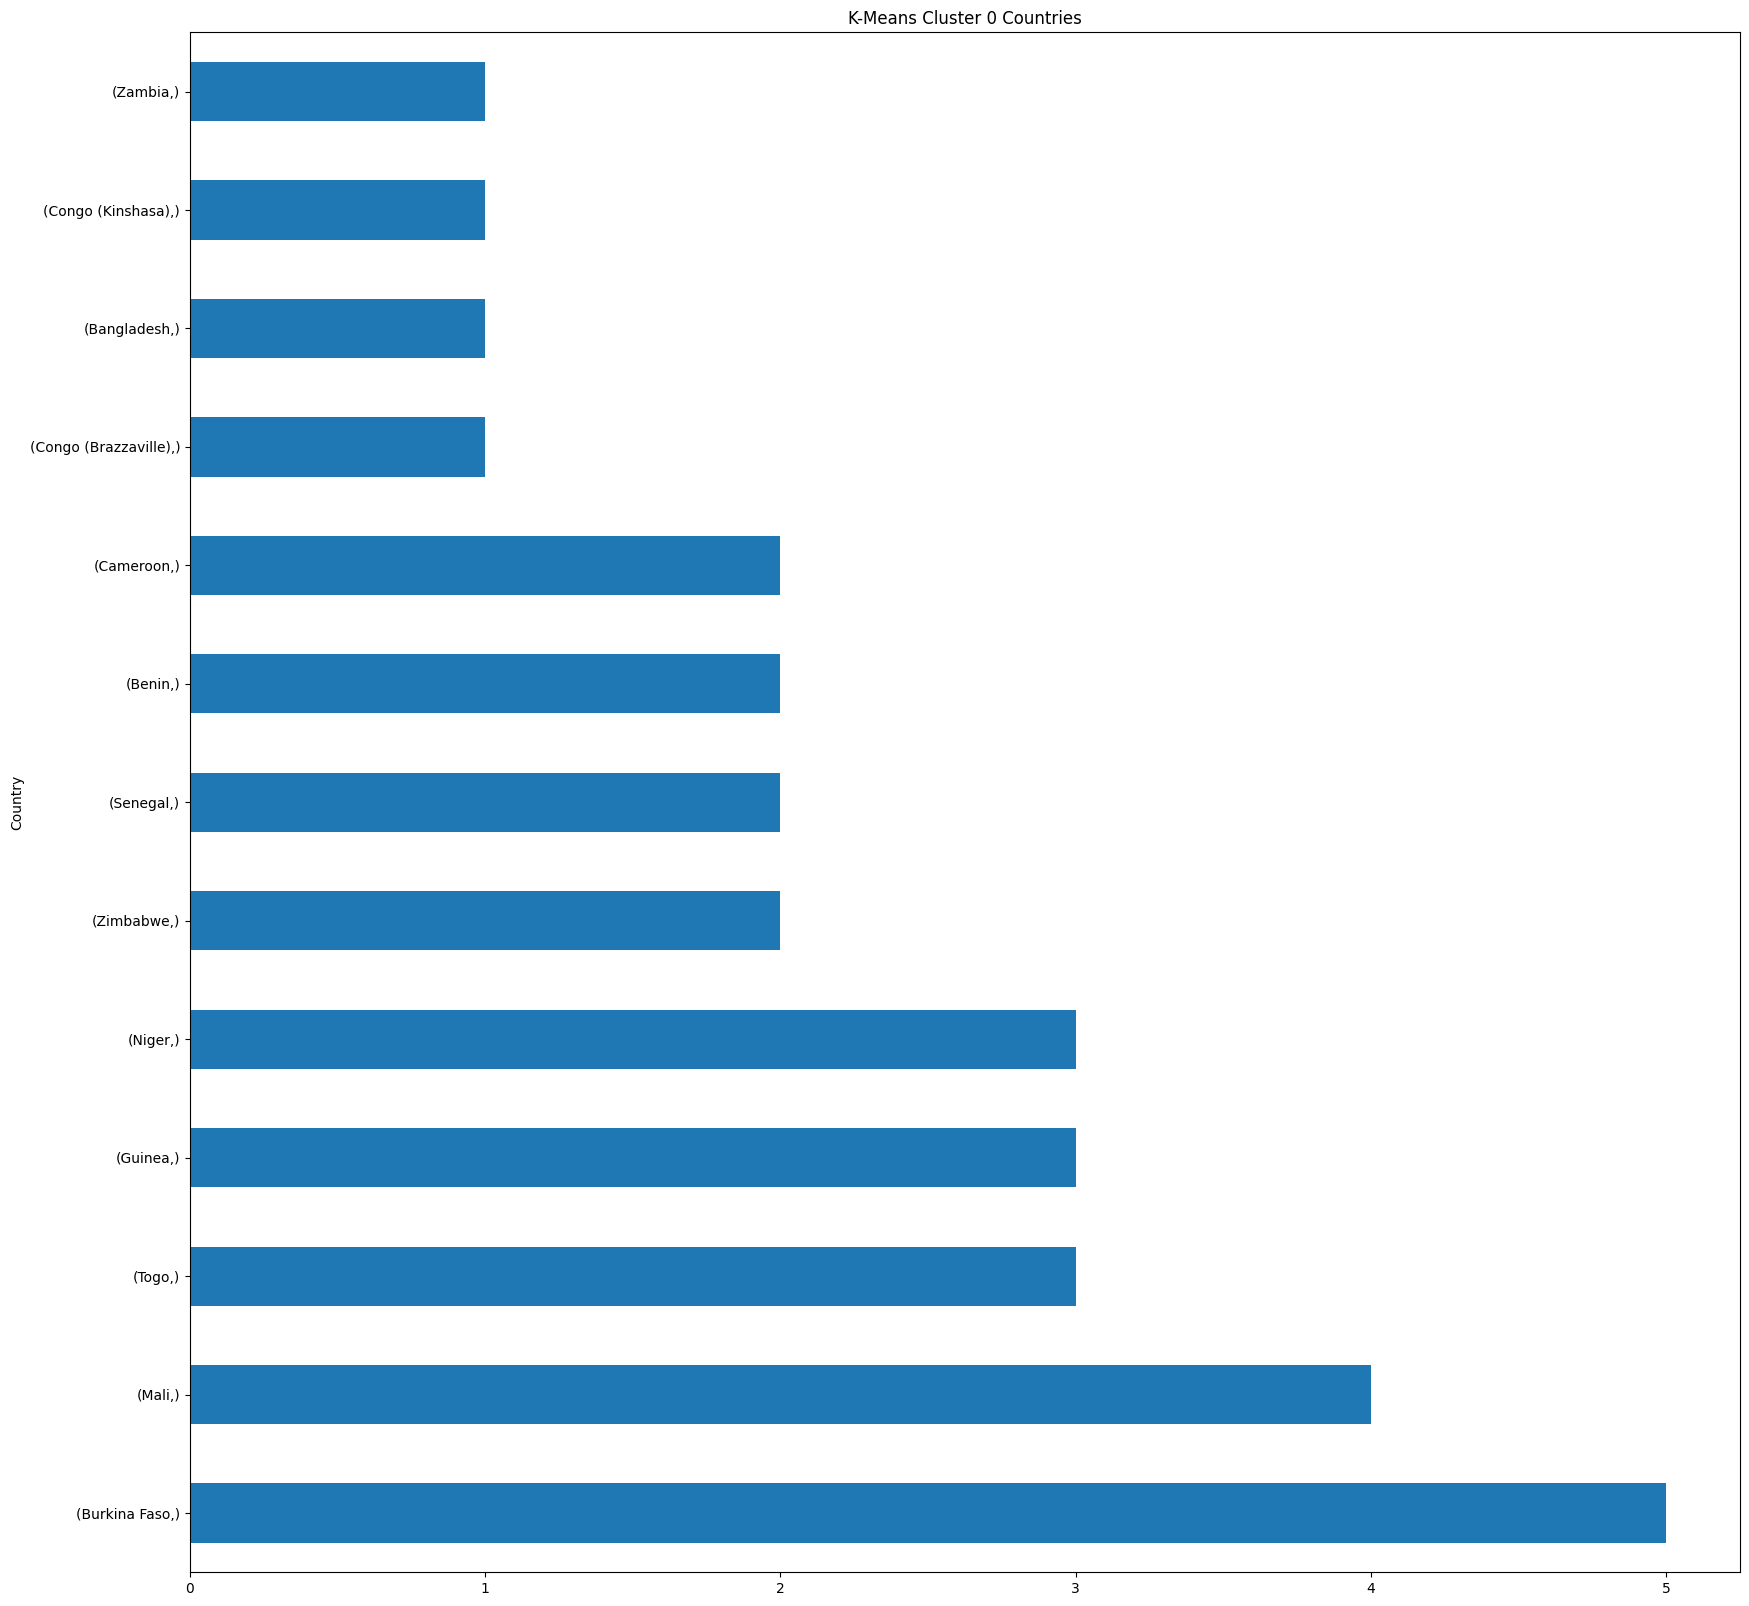

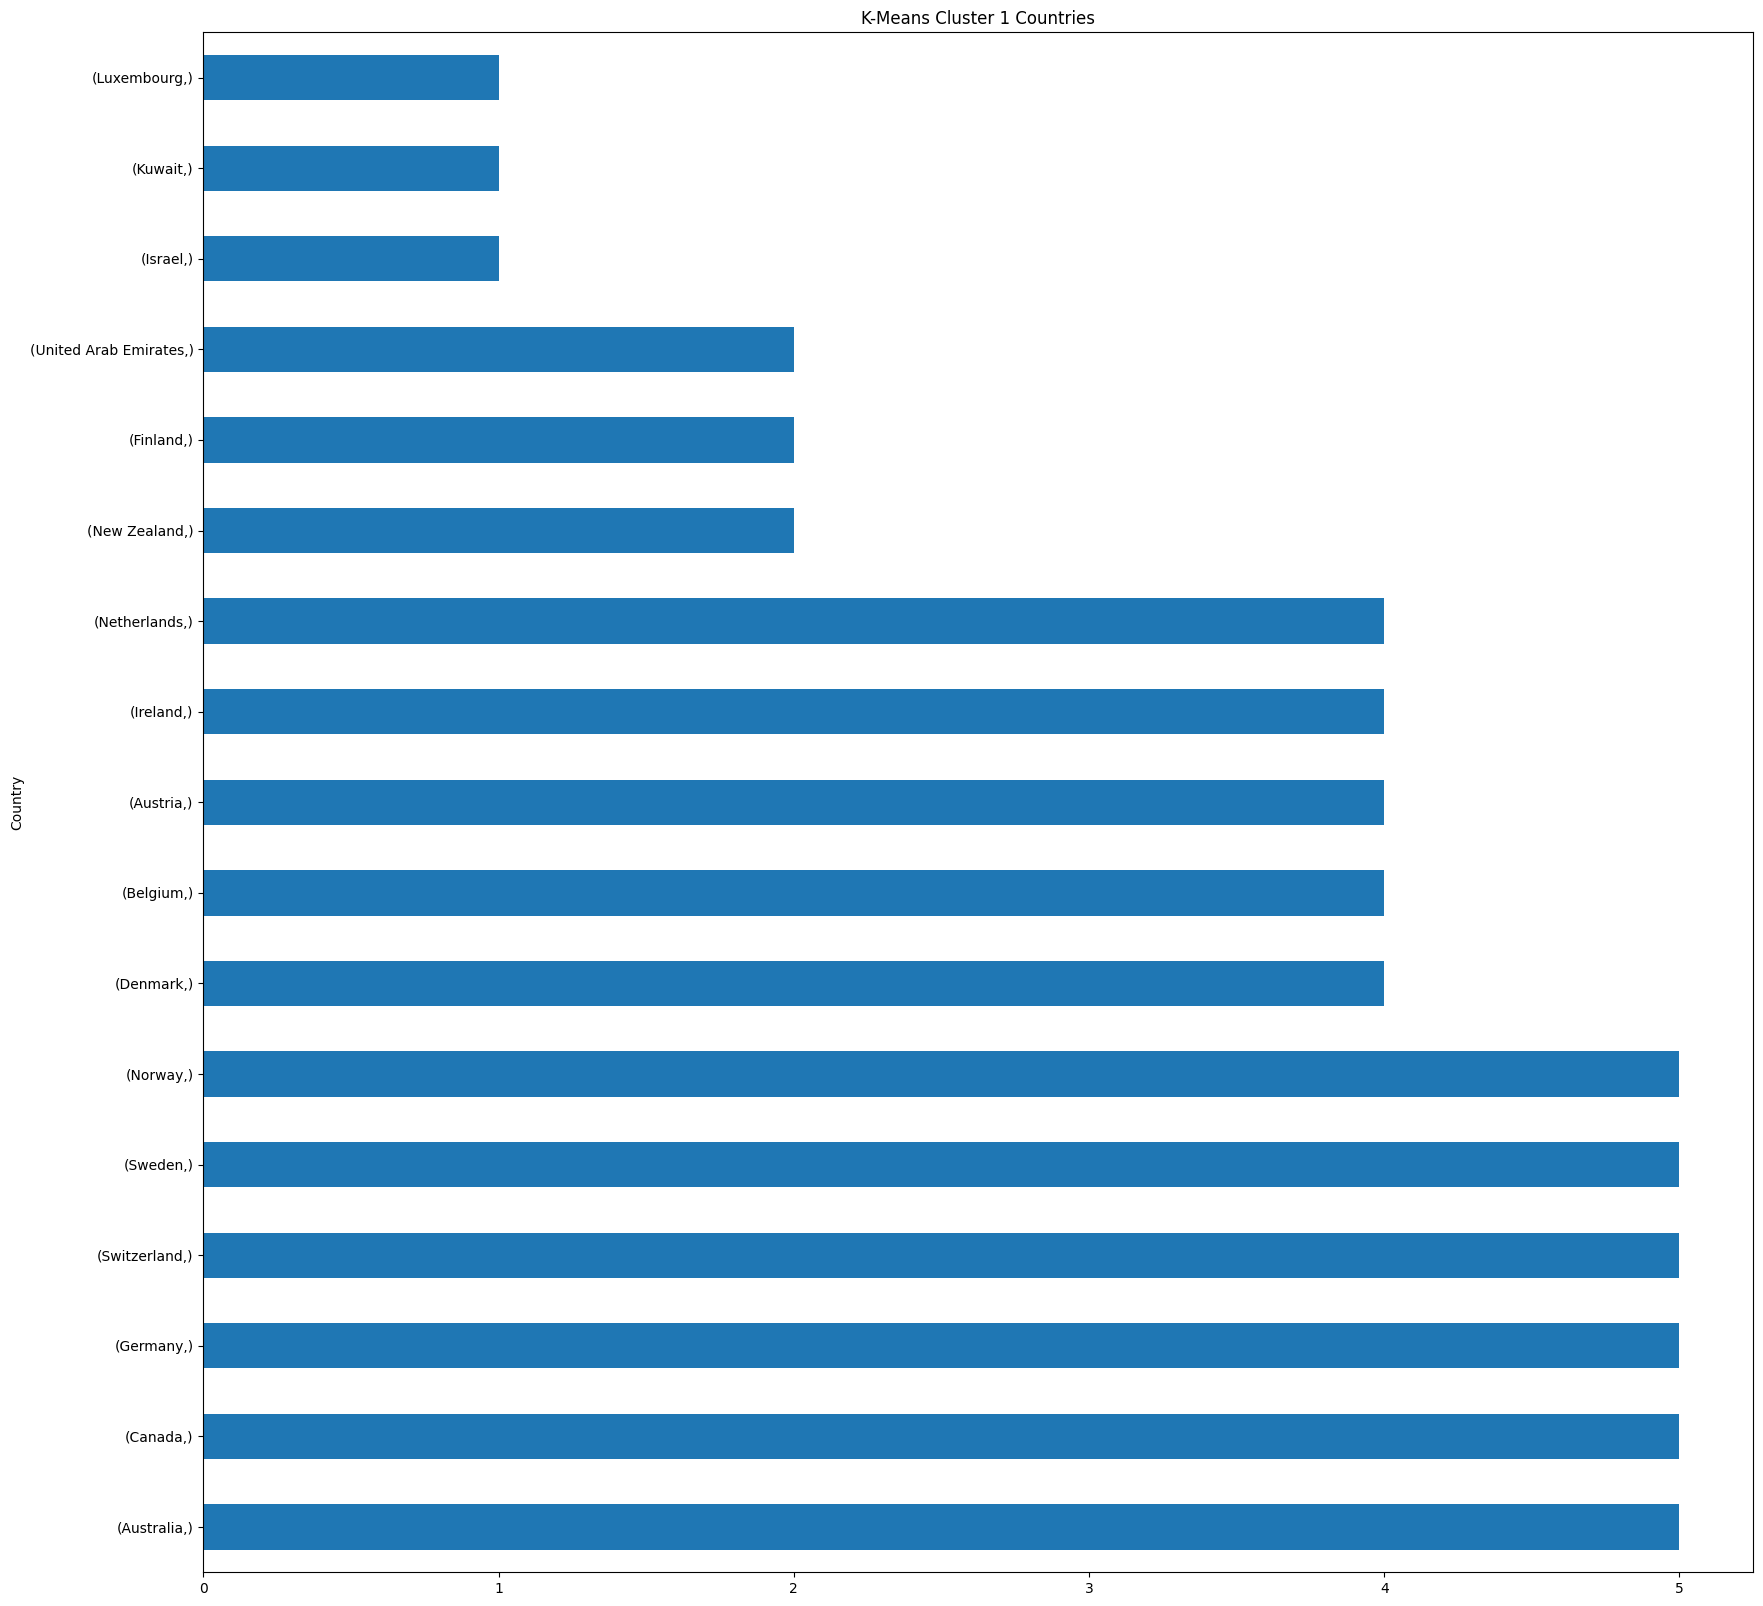

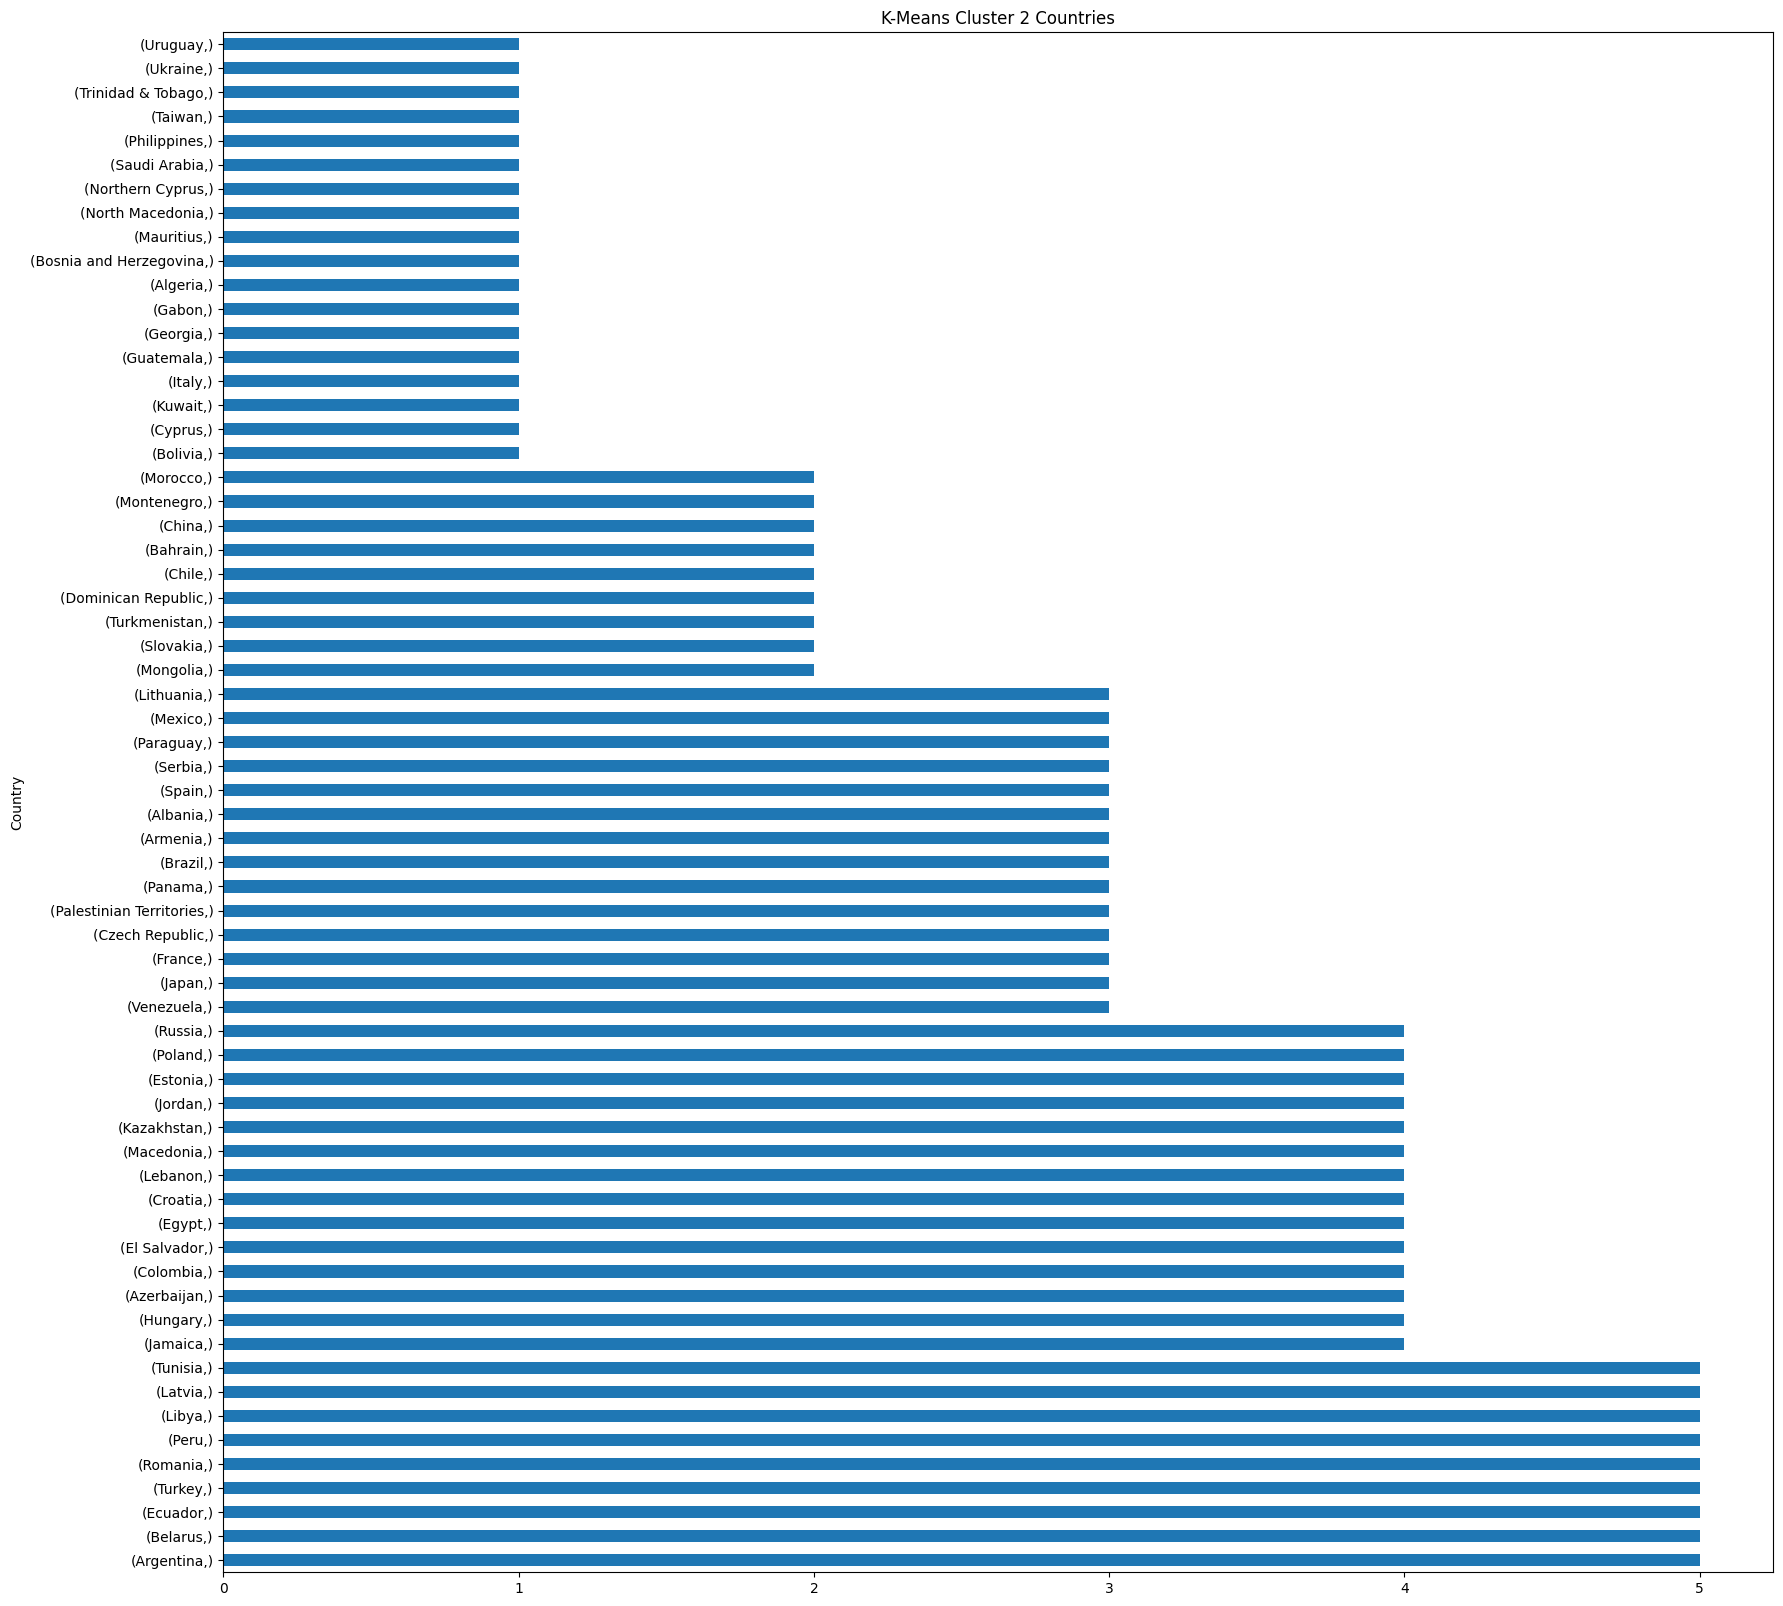

In [334]:
print("\nHDBSCAN Cluster Countries:")
# coounts in each cluster
for i in np.unique(hdb_labels):
    print(f"Cluster {i} Count: {len(X[X['HDBSCAN Cluster'] == i])}")
#box plot
plt.figure(figsize=(12, 8))
sns.boxplot(x="HDBSCAN Cluster", y="Happiness Score", data=X)
plt.title("Happiness Score Distribution by HDBSCAN Cluster")
plt.show()
for i in np.unique(hdb_labels):
    plt.figure(1, figsize=(20, 20))
    X_kmeans = X[X["HDBSCAN Cluster"] == i][["Country"]].value_counts().plot(kind="barh")
    plt.title(f"K-Means Cluster {i} Countries")
    plt.show()


#### How do the clusters identified by DBSCAN differ from those by K-Means? 

1. **Cluster Shape**:  
   - **K-Means** assumes spherical clusters.  
   - **DBSCAN** handles arbitrarily shaped clusters.

2. **Noise Handling**:  
   - **K-Means** assigns all points to clusters, including outliers.  
   - **DBSCAN** identifies noise as **Cluster -1**, leaving it unclustered.

3. **Cluster Count**:  
   - **K-Means** requires a predefined number of clusters.  
   - **DBSCAN** determines clusters based on density parameters.

4. **Dense Areas**:  
   - **DBSCAN** excels with dense regions and varying densities.  
   - **K-Means** struggles with clusters of varying density.

5. **Result Interpretation**:  
   - **DBSCAN** often forms a large cluster with separate noise points.  
   - **K-Means** provides well-defined groups but may miss irregular patterns.

#### Which algorithm produces clusters that better align with regional or socio-economic patterns in the dataset? 

- **DBSCAN** and **HDBSCAN** are more likely to capture the nuanced socio-economic and regional patterns compared to **K-Means**.
- **DBSCAN** is well-suited for data with varying densities, but it can be sensitive to parameter choices.
- **HDBSCAN** improves upon DBSCAN, providing more flexible, hierarchical clusters with varying densities, making it particularly useful for complex socio-economic or regional data.
- **K-Means** may miss nuanced patterns, especially in datasets with varying cluster shapes and densities, but it can still provide useful clusters for simpler, well-defined regional or socio-economic categories.


## Bonus

### Splitting dataset

In [335]:
# Splitting Dataset
X_kmeans = X.drop([
    "Country",
    "Happiness Score",
    "DBSCAN Cluster",
    "HDBSCAN Cluster",
]
, axis=1)
y_kmeans = X["Happiness Score"]

X_dbscan = X.drop(
    [
        "Country",
        "Happiness Score",
        "Cluster",
        "HDBSCAN Cluster",
    ],
    axis=1,
)
y_dbscan = X["Happiness Score"]

X_hdbscan = X.drop(
    [
        "Country",
        "Happiness Score",
        "Cluster",
        "DBSCAN Cluster",
    ],
    axis=1,
)
y_hdbscan = X["Happiness Score"]

In [336]:
X_train_kmeans, X_test_kmeans, y_train_kmeans, y_test_kmeans = train_test_split(
    X_kmeans, y_kmeans, test_size=0.2, random_state=42
)

X_train_dbscan, X_test_dbscan, y_train_dbscan, y_test_dbscan = train_test_split(
    X_dbscan, y_dbscan, test_size=0.2, random_state=42
)

X_train_hdbscan, X_test_hdbscan, y_train_hdbscan, y_test_hdbscan = train_test_split(
    X_hdbscan, y_hdbscan, test_size=0.2, random_state=42
)

### Random Forest Regressor

In [337]:
# Random Forest Regressor
rf_kmeans = RandomForestRegressor(random_state=42)
rf_dbscan = RandomForestRegressor(random_state=42)
rf_hdbscan = RandomForestRegressor(random_state=42)

# Train the models
rf_kmeans.fit(X_train_kmeans, y_train_kmeans)
rf_dbscan.fit(X_train_dbscan, y_train_dbscan)
rf_hdbscan.fit(X_train_hdbscan, y_train_hdbscan)

# Predict on the test set
y_pred_kmeans = rf_kmeans.predict(X_test_kmeans)
y_pred_dbscan = rf_dbscan.predict(X_test_dbscan)
y_pred_hdbscan = rf_hdbscan.predict(X_test_hdbscan)

# Evaluate the models
r2_kmeans = r2_score(y_test_kmeans, y_pred_kmeans)
mae_kmeans = mean_absolute_error(y_test_kmeans, y_pred_kmeans)

r2_dbscan = r2_score(y_test_dbscan, y_pred_dbscan)
mae_dbscan = mean_absolute_error(y_test_dbscan, y_pred_dbscan)

r2_hdbscan = r2_score(y_test_hdbscan, y_pred_hdbscan)
mae_hdbscan = mean_absolute_error(y_test_hdbscan, y_pred_hdbscan)

print("K-Means Model Evaluation:")
print(f"R^2 Score: {r2_kmeans:.4f}")
print(f"Mean Absolute Error: {mae_kmeans:.4f}")

print("\nDBSCAN Model Evaluation:")
print(f"R^2 Score: {r2_dbscan:.4f}")
print(f"Mean Absolute Error: {mae_dbscan:.4f}")

print("\nHDBSCAN Model Evaluation:")
print(f"R^2 Score: {r2_hdbscan:.4f}")
print(f"Mean Absolute Error: {mae_hdbscan:.4f}")

K-Means Model Evaluation:
R^2 Score: 0.8072
Mean Absolute Error: 0.3791

DBSCAN Model Evaluation:
R^2 Score: 0.8027
Mean Absolute Error: 0.3872

HDBSCAN Model Evaluation:
R^2 Score: 0.7942
Mean Absolute Error: 0.3953


### Linear Regressor

In [338]:
# linear regression
lr_kmeans = LinearRegression()
lr_dbscan = LinearRegression()
lr_hdbscan = LinearRegression()

# Train the models
lr_kmeans.fit(X_train_kmeans, y_train_kmeans)
lr_dbscan.fit(X_train_dbscan, y_train_dbscan)
lr_hdbscan.fit(X_train_hdbscan, y_train_hdbscan)

# Predict on the test set
y_pred_kmeans = lr_kmeans.predict(X_test_kmeans)
y_pred_dbscan = lr_dbscan.predict(X_test_dbscan)
y_pred_hdbscan = lr_hdbscan.predict(X_test_hdbscan)

# Evaluate the models
r2_kmeans = r2_score(y_test_kmeans, y_pred_kmeans)
mae_kmeans = mean_absolute_error(y_test_kmeans, y_pred_kmeans)

r2_dbscan = r2_score(y_test_dbscan, y_pred_dbscan)
mae_dbscan = mean_absolute_error(y_test_dbscan, y_pred_dbscan)

r2_hdbscan = r2_score(y_test_hdbscan, y_pred_hdbscan)
mae_hdbscan = mean_absolute_error(y_test_hdbscan, y_pred_hdbscan)

print("K-Means Regression Results:")
print(f"R^2 Score: {r2_kmeans:.4f}")
print(f"Mean Absolute Error: {mae_kmeans:.4f}")

print("\nDBSCAN Regression Results:")
print(f"R^2 Score: {r2_dbscan:.4f}")
print(f"Mean Absolute Error: {mae_dbscan:.4f}")

print("\nHDBSCAN Regression Results:")
print(f"R^2 Score: {r2_hdbscan:.4f}")
print(f"Mean Absolute Error: {mae_hdbscan:.4f}")

K-Means Regression Results:
R^2 Score: 0.7381
Mean Absolute Error: 0.4470

DBSCAN Regression Results:
R^2 Score: 0.7580
Mean Absolute Error: 0.4402

HDBSCAN Regression Results:
R^2 Score: 0.7396
Mean Absolute Error: 0.4437


### Bonus Conclusion

The **Random Forest** model generally performs better in terms of R² score and mean absolute error, with **K-Means** providing the best results among the clustering algorithms.
For **Linear Regression**, **DBSCAN** has a slightly better R² score, while the performance difference between the models is **marginal**.